## NumPy

### ndarray

是一个通用的同构数据多维容器，即所有元素类型相同

每个数组有一个shape（表示各维度大小的元组）和一个dtype（说明数据类型的对象）

In [5]:
import numpy as np

data=[
    [1,2,3,4],
    [5,6,7,8]
]
arr=np.array(data)

print(arr.shape)
print(arr.dtype)

(2, 4)
int32


### 创建数组

对np.array()方法传入嵌套列表：

In [7]:
data=[
    [1,2,3,4],
    [5,6,7,8]
]
arr=np.array(data)

print(arr)

[[1 2 3 4]
 [5 6 7 8]]


创建特殊数组：

##### 全0数组zeros()

In [11]:
np.zeros((4,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

##### 全空数组empty()

实际上全空的值均为未初始化的垃圾值

In [10]:
np.empty((2,3,2))

array([[[8.26441598e-312, 2.47032823e-322],
        [0.00000000e+000, 0.00000000e+000],
        [1.78020168e-306, 3.69776220e-062]],

       [[6.56446503e-091, 1.56082889e+161],
        [5.41544661e-067, 1.43287442e+161],
        [3.99910963e+252, 2.52619325e-052]]])

##### 序列生成arange()

In [13]:
np.arange(16)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

##### 其他：
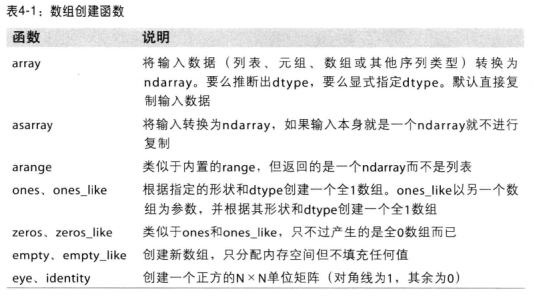

### 数据类型dtype

##### astype()显式转换

astype()方法会创建出一个新数组，即使前后dtype一致

In [16]:
arr=np.array([1,2,3,4,5])
arr.dtype

dtype('int32')

In [17]:
float_arr=arr.astype(np.float64)
float_arr.dtype

dtype('float64')

##### dtype另一种用法：

In [20]:
empty_int=np.empty(6,dtype='int')
print(empty_int)

[         72        4210  1993516080         389           0 -2147483648]


### 数组与标量运算

以下运算均为简单的点对点或一对多的元素标量运算，非矩阵运算

In [29]:
arr=np.array([
    [1,2,3],
    [4,5,6]
])

arr

array([[1, 2, 3],
       [4, 5, 6]])

In [22]:
arr*arr

array([[ 1,  4,  9],
       [16, 25, 36]])

In [23]:
arr-arr

array([[0, 0, 0],
       [0, 0, 0]])

In [24]:
1/arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [25]:
arr**0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

### 索引和切片

In [31]:
arr=np.array(np.arange(10))
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [32]:
arr[5]

5

In [34]:
arr[5:8]

array([5, 6, 7])

In [35]:
arr[5:8]=12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

**值得注意的是，数组切片得到的是原数组的视图，即数据不会被复制，对视图的更改将直接反映到原数组上**

##### copy()方法得到一份复制：

In [38]:
arr_partcopy=arr[5:8].copy()
arr_partcopy

array([12, 12, 12])

#### 高维切片

In [39]:
arr2d=np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

##### 沿着0轴切片

In [40]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

##### 多个切片

In [41]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

### 布尔型切片

In [46]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [47]:
data = np.random.randn(7, 4)
data

array([[ 1.77467158e-01,  2.03416350e+00,  7.06617577e-01,
         2.15114908e-01],
       [ 5.97025694e-02, -2.61464281e-01, -2.82447944e+00,
        -2.28413656e+00],
       [ 1.54220386e-01, -2.10408938e+00, -8.93036453e-01,
         1.88449313e+00],
       [ 1.52429174e+00,  1.36640085e+00,  7.46485332e-01,
        -1.79001560e+00],
       [-8.92415963e-01,  1.24450040e+00,  2.77708035e-01,
         6.67317868e-01],
       [ 1.79694736e+00, -1.60036891e-03,  1.72415572e+00,
        -3.52225359e-01],
       [-8.54034384e-01,  1.13495356e-01, -1.56875850e+00,
        -1.13932101e+00]])

注意到names有7个元素，data有7行

假设names元素与data的行一一对应

而我们想选出‘Bob’对应的所有行

**先用names和字符‘Bob’的比较运算符产生一个布尔数组：**

In [48]:
names=='Bob'

array([ True, False, False,  True, False, False, False])

**这个布尔数组可以用作数组索引（布尔数组的长度必须和被索引的轴长度一致）：**

In [50]:
data[names=='Bob']

array([[ 0.17746716,  2.0341635 ,  0.70661758,  0.21511491],
       [ 1.52429174,  1.36640085,  0.74648533, -1.7900156 ]])

##### 还可以使用!=或~进行否定选取：

In [51]:
data[names!='Bob']

array([[ 5.97025694e-02, -2.61464281e-01, -2.82447944e+00,
        -2.28413656e+00],
       [ 1.54220386e-01, -2.10408938e+00, -8.93036453e-01,
         1.88449313e+00],
       [-8.92415963e-01,  1.24450040e+00,  2.77708035e-01,
         6.67317868e-01],
       [ 1.79694736e+00, -1.60036891e-03,  1.72415572e+00,
        -3.52225359e-01],
       [-8.54034384e-01,  1.13495356e-01, -1.56875850e+00,
        -1.13932101e+00]])

In [55]:
data[~(names=='Bob')]

array([[ 5.97025694e-02, -2.61464281e-01, -2.82447944e+00,
        -2.28413656e+00],
       [ 1.54220386e-01, -2.10408938e+00, -8.93036453e-01,
         1.88449313e+00],
       [-8.92415963e-01,  1.24450040e+00,  2.77708035e-01,
         6.67317868e-01],
       [ 1.79694736e+00, -1.60036891e-03,  1.72415572e+00,
        -3.52225359e-01],
       [-8.54034384e-01,  1.13495356e-01, -1.56875850e+00,
        -1.13932101e+00]])

##### 常用例子：将数组中的负数设置为0

In [56]:
data[data<0]=0
data

array([[0.17746716, 2.0341635 , 0.70661758, 0.21511491],
       [0.05970257, 0.        , 0.        , 0.        ],
       [0.15422039, 0.        , 0.        , 1.88449313],
       [1.52429174, 1.36640085, 0.74648533, 0.        ],
       [0.        , 1.2445004 , 0.27770804, 0.66731787],
       [1.79694736, 0.        , 1.72415572, 0.        ],
       [0.        , 0.11349536, 0.        , 0.        ]])

### 花式索引Fancy indexing

**与切片最大的不同之处在于它总是将数据复制到新数组中！！**


In [57]:
arr=np.empty((8,4))
for i in range(8):
    arr[i]=i
    
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

##### 选取特定行数

In [58]:
arr[[4,3,0,6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

##### 选取特定列数

In [59]:
arr[:,[0,3,1,2]]

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

##### 选取特定位置元素

In [61]:
arr=np.arange(32).reshape((8,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [62]:
arr[[1,5,7,2],[0,3,1,2]]

array([ 4, 23, 29, 10])

分别是(1,0),(5,3),(7,1),(2,2)元素

##### 选取指定行与列

In [63]:
arr[[1,5,7,2]][:,[0,3,1,2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

其实相当于两次切片，第一次选行，第二次选列

##### 或者使用np.ix_()函数

可以将两个一维整数数组转化为一个用于选取方形区域的索引器

In [64]:
arr[np.ix_([1,5,7,2],[0,3,1,2])]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### 转置和轴对换

In [65]:
arr=np.arange(15).reshape((3,5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

##### 转置T

In [66]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

**用于计算內积**

In [67]:
np.dot(arr.T,arr)

array([[125, 140, 155, 170, 185],
       [140, 158, 176, 194, 212],
       [155, 176, 197, 218, 239],
       [170, 194, 218, 242, 266],
       [185, 212, 239, 266, 293]])

##### 高维转置transpose

In [68]:
arr=np.arange(16).reshape((2,2,4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [69]:
arr.transpose((1,0,2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

##### swapaxes()方法接受一对轴编号

返回的也是视图不是复制

In [71]:
arr.swapaxes(1,2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

### 通用函数

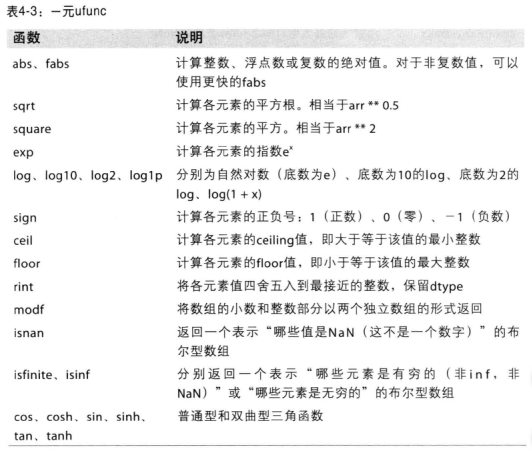

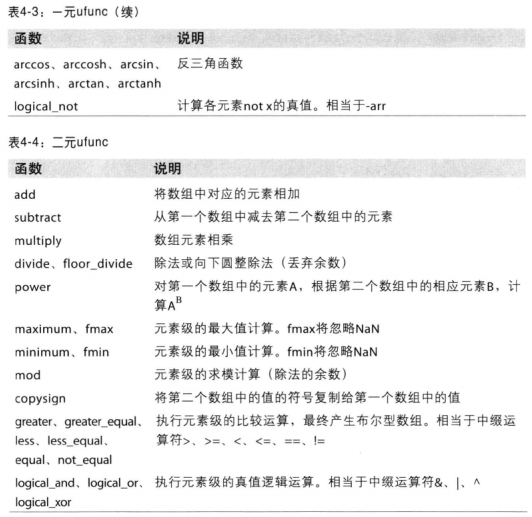

### 利用数组进行数据处理

##### 实例：计算sqrt(x^2+y^2)并画图

In [73]:
points=np.arange(-5,5,0.01)
xs,ys=np.meshgrid(points,points)

**meshgrid()函数接受两个一维数组，并产生两个二维矩阵（对应于数组中所有（x,y）对）**

In [74]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [75]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [78]:
import matplotlib.pyplot as plt

z=np.sqrt(xs**2+ys**2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2+y^2}$ for a grid of values')

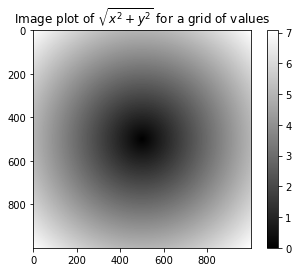

In [80]:
plt.imshow(z,cmap=plt.cm.gray);plt.colorbar()
plt.title("Image plot of $\sqrt{x^2+y^2}$ for a grid of values")

### 条件逻辑表述为数组运算

##### np.where()函数

三元表达式x if condition else y的矢量化版本

In [81]:
xarr=np.array([1.1,1.2,1.3,1.4,1.5])
yarr=np.array([2.1,2.2,2.3,2.4,2.5])
cond=np.array([True,False,True,True,False])

**希望根据cond中的值选取xarr或yarr的值**

##### 三元表达式：

In [83]:
result=[(x if c else y)
       for x,y,c in zip(xarr,yarr,cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

存在的问题:

1.对大数组处理速度慢

2.无法用于多维数组

##### np.where  :

In [84]:
result=np.where(cond,xarr,yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

好处在于：

**第二第三个参数可以不是数组，而是标量**

##### 实例：将所有正值赋1，复制赋-1  ：

In [87]:
arr=np.random.randn(4,4)
arr

array([[-0.07557473,  0.11731157,  0.23743618,  0.97161057],
       [-0.15886746,  1.27750652,  2.14784646, -0.75438741],
       [-0.76478986, -1.34719826, -0.55022281, -0.0846672 ],
       [ 0.70766389, -0.38863852, -0.18770423,  2.112976  ]])

In [88]:
np.where(arr>0,1,-1)

array([[-1,  1,  1,  1],
       [-1,  1,  1, -1],
       [-1, -1, -1, -1],
       [ 1, -1, -1,  1]])

##### 如果只想改变正值：

In [89]:
np.where(arr>0,1,arr)

array([[-0.07557473,  1.        ,  1.        ,  1.        ],
       [-0.15886746,  1.        ,  1.        , -0.75438741],
       [-0.76478986, -1.34719826, -0.55022281, -0.0846672 ],
       [ 1.        , -0.38863852, -0.18770423,  1.        ]])

### 数学和统计方法

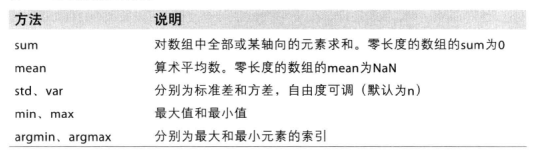

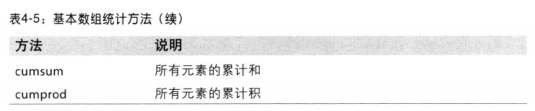

In [90]:
arr=np.random.randn(5,4)
arr.mean()

0.06300762099776427

In [91]:
np.mean(arr)

0.06300762099776427

In [92]:
arr.mean(axis=0)#0代表行与行之间

array([ 0.10333067,  0.56668185,  0.31087527, -0.72885731])

In [93]:
arr.mean(axis=1)#1代表列与列之间

array([-0.14544997, -0.06960178,  0.27331012,  0.04185565,  0.21492408])

In [94]:
arr=np.arange(9).reshape(3,3)
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [95]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [97]:
arr.cumsum(axis=1)

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]], dtype=int32)

### 用于布尔数组的方法

##### sum常用于对布尔型数组中的True值计数：

In [99]:
arr=np.random.randn(100)
(arr>0).sum() 

42

##### any用于测试数组中是否存在一个或以上True

In [100]:
bools=np.array([False,False,True,False])
bools.any()

True

##### all检查数组中是否所有值为True

In [101]:
bools.all()

False

**any()和all()方法也可用于其他数组，所有非0元素均视为True**

### 排序sort

**sort()方法返回的是改变排序的数组，即排序本身就会改变数组**

In [103]:
arr=np.random.randn(8)
arr

array([-0.39067456, -1.58430197,  0.66452092,  0.35160248,  0.49125492,
       -0.57178799, -0.16898824, -1.04376886])

In [105]:
arr.sort()
arr

array([-1.58430197, -1.04376886, -0.57178799, -0.39067456, -0.16898824,
        0.35160248,  0.49125492,  0.66452092])

##### 多维数组按轴向排序

In [109]:
arr=np.random.randn(5,3)
arr

array([[-2.76879187,  0.59095792,  0.32677845],
       [ 1.18775038,  2.15242329,  0.80247424],
       [-1.04458021,  2.14607734, -1.09061975],
       [ 0.14629275, -0.93657328, -0.89299289],
       [-1.0613066 , -1.47992129, -0.78851629]])

In [110]:
arr.sort(axis=0)
arr

array([[-2.76879187, -1.47992129, -1.09061975],
       [-1.0613066 , -0.93657328, -0.89299289],
       [-1.04458021,  0.59095792, -0.78851629],
       [ 0.14629275,  2.14607734,  0.32677845],
       [ 1.18775038,  2.15242329,  0.80247424]])

In [111]:
arr.sort(axis=1)
arr

array([[-2.76879187, -1.47992129, -1.09061975],
       [-1.0613066 , -0.93657328, -0.89299289],
       [-1.04458021, -0.78851629,  0.59095792],
       [ 0.14629275,  0.32677845,  2.14607734],
       [ 0.80247424,  1.18775038,  2.15242329]])

##### 利用排序计算分位数：

In [112]:
large_arr=np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05*len(large_arr))]  #5%分位数

-1.6822216679566513

### 集合运算
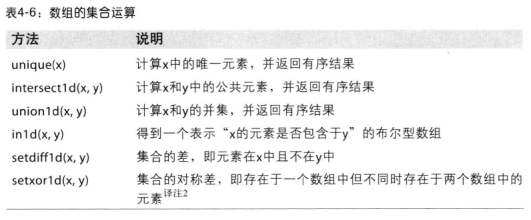

In [113]:
values=np.array([6,0,0,3,2,5,6])
np.in1d(values,[2,3,6])

array([ True, False, False,  True,  True, False,  True])

### 二进制格式输入输出

In [114]:
arr=np.random.randn(10)
arr

array([ 0.69546524, -1.03753389, -0.63761874,  0.8859509 ,  1.60711545,
        0.42267911, -1.20426276,  0.77563502, -1.88595847, -1.20832458])

In [115]:
np.save('ten_randn',arr)

In [116]:
np.load('ten_randn.npy')

array([ 0.69546524, -1.03753389, -0.63761874,  0.8859509 ,  1.60711545,
        0.42267911, -1.20426276,  0.77563502, -1.88595847, -1.20832458])

##### 多数组压缩savez()

In [117]:
np.savez('array_archive.npz',a=arr,b=arr)

In [119]:
arch=np.load("array_archive.npz")
arch['b']

array([ 0.69546524, -1.03753389, -0.63761874,  0.8859509 ,  1.60711545,
        0.42267911, -1.20426276,  0.77563502, -1.88595847, -1.20832458])

### 线性代数

##### 点乘

In [120]:
x=np.array([
    [1.,2.,3.],
    [4.,5.,6.]
])
y=np.array([
    [6.,23.],
    [-1,.7,],
    [8.,9.]
])

In [121]:
x.dot(y)

array([[ 28. ,  51.4],
       [ 67. , 149.5]])

In [122]:
np.dot(x,y)

array([[ 28. ,  51.4],
       [ 67. , 149.5]])

##### 求逆

In [156]:
from numpy.linalg import inv
X=np.array([
    [1,2],
    [3,0]
])
inv(X)

array([[ 0.        ,  0.33333333],
       [ 0.5       , -0.16666667]])

In [157]:
X.dot(inv(X))

array([[1., 0.],
       [0., 1.]])

##### QR分解

In [158]:
from numpy.linalg import qr

q,r=qr(mat)

In [159]:
q

array([[-0.7878267 , -0.03805292, -0.44468773, -0.38357741,  0.18166522],
       [ 0.34857332, -0.80826735, -0.46083918, -0.11133534, -0.02078997],
       [ 0.29865396,  0.52340419, -0.75511542,  0.24647828,  0.07683121],
       [ 0.36051531,  0.26699606,  0.02396356, -0.87654228, -0.17274604],
       [ 0.19662209, -0.00412756,  0.13822634, -0.10674689,  0.9647908 ]])

In [160]:
r

array([[-2.47026615,  1.19838919,  2.40891288,  5.14000498,  1.65305574],
       [ 0.        , -2.18259501,  3.67615101,  3.74822827,  0.32223609],
       [ 0.        ,  0.        , -2.92326349, -0.38858382,  0.46804718],
       [ 0.        ,  0.        ,  0.        , -8.15662476, -1.69585335],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  2.12764119]])

##### 其他：
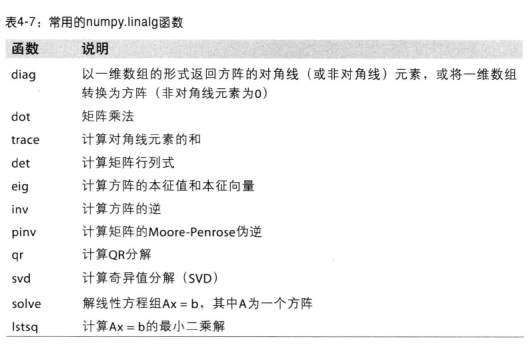

### 随机数生成
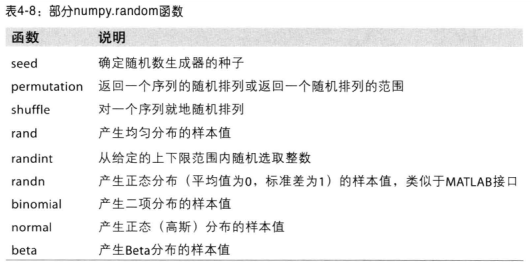

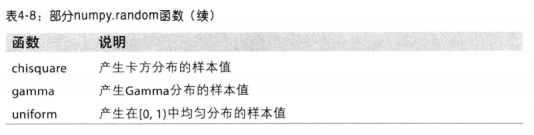

In [166]:
samples=np.random.normal(size=(4,4))
samples

array([[ 0.04286722, -1.46008576, -0.20113961,  0.30110163],
       [-0.21293167,  1.51646016, -1.19710276,  1.61575241],
       [-1.13777344,  0.71137   , -0.03154092,  1.23149043],
       [ 0.10745314,  0.97165014,  0.58773246,  0.44620659]])

**一定要说明传入size参数，否则传入的数对分别为正态的均值和方差参数**

### 范例：随机漫步

In [168]:
import random
position=0
walk=[position]
steps=1000
for i in range(steps):
    step=1 if random.randint(0,1) else -1
    position+=step
    walk.append(position)

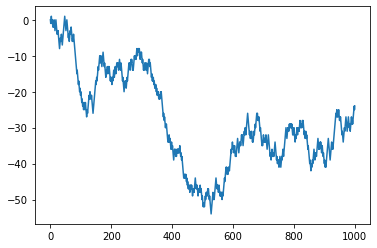

In [171]:
import matplotlib.pyplot as plt
plt.plot(walk)

##### 也可用np模块实现：

In [172]:
nsteps=1000
draws=np.random.randint(0,2,size=nsteps)#生成1000个0或2的随机样本
steps=np.where(draws>0,1,-1)#根据随机样本的结果生成1或-1的序列
walk=steps.cumsum()#序列逐项累加后得到每一次漫步的位置

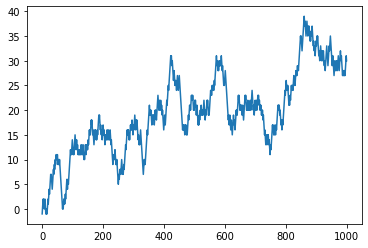

In [176]:
plt.plot(walk)

##### 一次实现多个漫步：

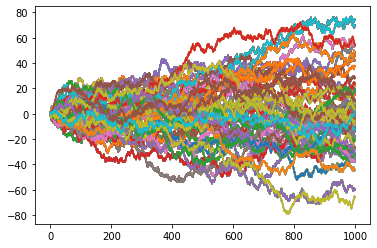

In [178]:
nwalks=5000
nsteps=1000
draws=np.random.randint(0,2,size=(nwalks,nsteps))
steps=np.where(draws>0,1,-1)
walk=steps.cumsum(1)
for i in walk[i]:
    plt.plot(walk[i])

## pandas

### Series

类似一维数组，由一组数据（各种NumPy数据类型）以及一组相关的数据标签（即索引）组成

In [179]:
from pandas import Series, DataFrame
import pandas as pd

In [180]:
obj=Series([4,7,-5,3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

**格式：索引index在左，数值values在右，dtype标注元素类型** 


In [182]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [181]:
obj.values

array([ 4,  7, -5,  3], dtype=int64)

##### 创建一个带有可以对各个数据进行标记的索引的Series

In [184]:
obj2=Series([4,7,-5,3],index=['d','b','a','c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [186]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

##### 也可以由字典转化来

In [189]:
sdata={
    'Ohio':35000,
    'Texas':71000,
    'Oregon':16000,
    'Utah':5000
}
obj3=Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

##### 检测缺失

In [190]:
obj4=Series(sdata,index=['California','Ohio','Oregon','Texas'])
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

**Series类似有序字典，会按照传入的index排序，且由于sdata中无California对应数据因此为NaN表示缺失**

In [191]:
pd.isnull(obj4)#检查缺失

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [193]:
obj4.isnull()#同上

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [192]:
pd.notnull(obj4)#检查非缺失

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

##### Series在算术运算中自动对齐不同索引数据

In [195]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [196]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [197]:
obj3+obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

##### Series对象及其索引的name属性

In [198]:
obj4.name='population'
obj4.index.name='stste'
obj4

stste
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

##### 索引可以通过直接赋值来修改

In [199]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [202]:
obj.index=['Bob','Steve','Jeff','Ryan']
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

### DataFrame

是表格型数据结构，含有一组有序的列，每列可以是不同类型的值

既有行索引，又有列索引

In [203]:
data={
    'state':['Ohio','Ohio','Ohio','Nevada','Nevada'],
    'year':[2000,2001,2002,2001,2002],
    'pop':[1.5,1.7,3.6,2.4,2.9]
}
frame=DataFrame(data)
frame

state  year  pop
0    Ohio  2000  1.5
1    Ohio  2001  1.7
2    Ohio  2002  3.6
3  Nevada  2001  2.4
4  Nevada  2002  2.9

**结果DataFrame自动加上索引index，且全部列被有序排列**

###### 也可手动添加参数columns指定列序列：

In [204]:
DataFrame(data,columns=['year','state','pop'])

year   state  pop
0  2000    Ohio  1.5
1  2001    Ohio  1.7
2  2002    Ohio  3.6
3  2001  Nevada  2.4
4  2002  Nevada  2.9

##### 还可以添加参数index指定索引名称：

In [228]:
frame2=DataFrame(data,columns=['year','state','pop','debt'],index=['one','two','three','four','five'])
frame2

year   state  pop debt
one    2000    Ohio  1.5  NaN
two    2001    Ohio  1.7  NaN
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN
five   2002  Nevada  2.9  NaN

**若传入的列在数据中找不到对应，就会产生NaN值**

##### 通过索引从DataFrame获取一列（Series）

In [211]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object

##### 通过索引字段loc或iloc获取一行

In [218]:
frame2.loc['three']#名称索引

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [217]:
frame2.iloc[2]#整数索引

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

##### 直接赋值修改列属性

In [229]:
frame2

year   state  pop debt
one    2000    Ohio  1.5  NaN
two    2001    Ohio  1.7  NaN
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN
five   2002  Nevada  2.9  NaN

In [230]:
frame2['debt']=0#统一赋相同值
frame2

year   state  pop  debt
one    2000    Ohio  1.5     0
two    2001    Ohio  1.7     0
three  2002    Ohio  3.6     0
four   2001  Nevada  2.4     0
five   2002  Nevada  2.9     0

In [232]:
frame2['debt']=np.arange(5.)#等长列表赋值
frame2

year   state  pop  debt
one    2000    Ohio  1.5   0.0
two    2001    Ohio  1.7   1.0
three  2002    Ohio  3.6   2.0
four   2001  Nevada  2.4   3.0
five   2002  Nevada  2.9   4.0

##### 为不存在的列赋值等与创造一新列

In [233]:
frame2['eastern']=frame2.state=='Ohio'
frame2

year   state  pop  debt  eastern
one    2000    Ohio  1.5   0.0     True
two    2001    Ohio  1.7   1.0     True
three  2002    Ohio  3.6   2.0     True
four   2001  Nevada  2.4   3.0    False
five   2002  Nevada  2.9   4.0    False

##### 关键字del删除列

In [234]:
del frame2['eastern']
frame2

year   state  pop  debt
one    2000    Ohio  1.5   0.0
two    2001    Ohio  1.7   1.0
three  2002    Ohio  3.6   2.0
four   2001  Nevada  2.4   3.0
five   2002  Nevada  2.9   4.0

**通过索引返回的均为视图而不是副本，直接改变会影响原DataFrame**

##### 嵌套字典转化为DataFrame

In [238]:
pop={
    'Nevada':{2001:2.4,2002:2.9},
    'Ohio':{2000:1.5,2001:1.7,2002:3.6}
}
frame3=DataFrame(pop)
frame3

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2000     NaN   1.5

##### 可以进行转置

In [236]:
frame3.T

2001  2002  2000
Nevada   2.4   2.9   NaN
Ohio     1.7   3.6   1.5

##### 值为Series的字典转化为DataFrame

In [239]:
pdata={
    'Ohio':frame3['Ohio'][:-1],
    'Nevada':frame3['Nevada'][:-2]
}
DataFrame(pdata)

Ohio  Nevada
2001   1.7     2.4
2002   3.6     NaN

##### 其它构造方式：
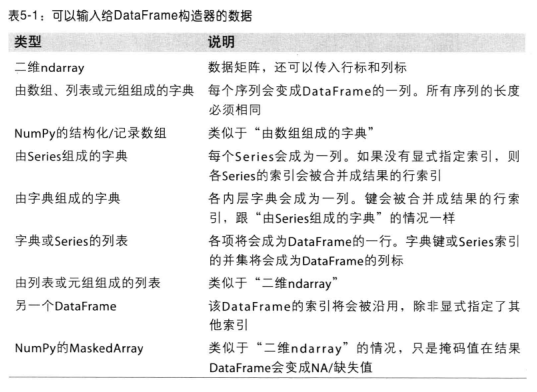


##### 设置index和columns的name属性

In [240]:
frame3

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2000     NaN   1.5

In [242]:
frame3.index.name='year'
frame3.columns.name='state'
frame3

state  Nevada  Ohio
year               
2001      2.4   1.7
2002      2.9   3.6
2000      NaN   1.5

##### index相关方法

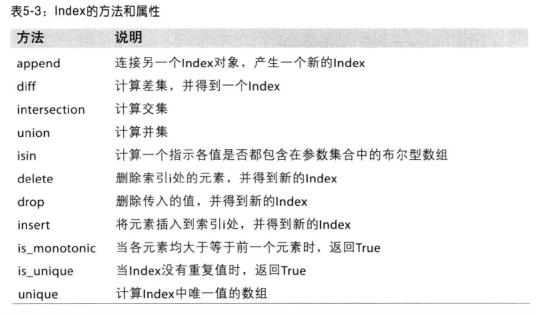

## 基本功能

##### 重新索引reindex

不是简单修改原对象，而是以原对象为基础创建一个新对象

若某个索引值无对应则创建空值

In [244]:
obj=Series([4.5,7.2,-5.3,3.6],index=['d','b','a','c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [245]:
obj2=obj.reindex(['a','b','c','d','e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

##### 当缺失值时引入指定值

In [247]:
obj.reindex(['a','b','c','d','e'],fill_value=0)

a   -5.3
b    7.2
c    3.6
d    4.5
e    0.0
dtype: float64

##### 前向值ffill、后向值bfill填充

In [249]:
obj3=Series(['blue','purple','yellow'],index=[0,2,4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [253]:
obj3.reindex(range(6),method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [255]:
obj3.reindex(range(6),method='bfill')

0      blue
1    purple
2    purple
3    yellow
4    yellow
5       NaN
dtype: object

##### Dataframe修改行索引

In [264]:
frame=DataFrame(np.arange(9).reshape(3,3),
                index=['a','c','d'],
                columns=['Ohio','Texas','California']
               )
frame

Ohio  Texas  California
a     0      1           2
c     3      4           5
d     6      7           8

In [266]:
frame2=frame.reindex(['a','b','c','d'])
frame2

Ohio  Texas  California
a   0.0    1.0         2.0
b   NaN    NaN         NaN
c   3.0    4.0         5.0
d   6.0    7.0         8.0

##### DataFrame修改列索引

In [267]:
states=['Texas','Utah','California']
frame.reindex(columns=states)

Texas  Utah  California
a      1   NaN           2
c      4   NaN           5
d      7   NaN           8

##### 同时对行列重新索引

In [277]:
frame.reindex(index=['a','b','c','d'],columns=states)

Texas  Utah  California
a    1.0   NaN         2.0
b    NaN   NaN         NaN
c    4.0   NaN         5.0
d    7.0   NaN         8.0

##### reindex的参数
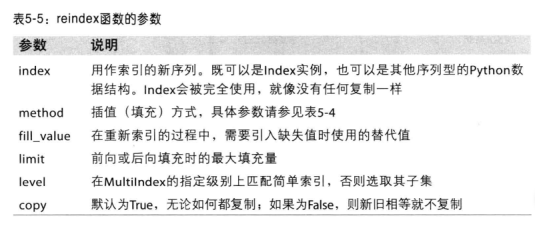

##### 丢弃指定轴上的项drop()

返回的是删除了指定值的新对象，原对象不改变

In [278]:
obj=Series(np.arange(5.),index=['a','b','c','d','e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [279]:
new_obj=obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

##### 删除DataFrame指定值

In [281]:
data=DataFrame(np.arange(16).reshape(4,4),
              index=['Ohio','Colorado','Utah','New York'],
              columns=['one','two','three','four'])
data

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

In [282]:
data.drop(['Ohio','Colorado'])

one  two  three  four
Utah        8    9     10    11
New York   12   13     14    15

##### 删除列一定要指定轴axis=1

In [286]:
data.drop('two',axis=1)

one  three  four
Ohio        0      2     3
Colorado    4      6     7
Utah        8     10    11
New York   12     14    15

### 索引选取过滤

In [287]:
obj=Series(np.arange(4.),index=['a','b','c','d'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [290]:
obj['b']

1.0

In [292]:
obj[1]

1.0

In [293]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [294]:
obj[['b','a','d']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [295]:
obj[[1,3,2]]

b    1.0
d    3.0
c    2.0
dtype: float64

In [296]:
obj[obj<2]

a    0.0
b    1.0
dtype: float64

**利用标签的切片是包含末端的:**

In [297]:
obj['b':'c']

b    1.0
c    2.0
dtype: float64

##### 对DataFrame的索引即获取行或列

In [298]:
data=DataFrame(np.arange(16).reshape(4,4),
              index=['Ohio','Colorado','Utah','New York'],
              columns=['one','two','three','four'])
data

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

In [299]:
data['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [300]:
data[:2]

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7

In [302]:
data[data['three']>5]

one  two  three  four
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

In [307]:
data.loc['Utah']

one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

In [308]:
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

##### 算术运算和数据对齐

In [312]:
df1=DataFrame(np.arange(9.).reshape(3,3),
             columns=list('bcd'),
             index=['Ohio','Texas','Colorado'])
df2=DataFrame(np.arange(12.).reshape(4,3),
             columns=list('bde'),
             index=['Utah','Ohio','Texas','Oregon'])
df1

b    c    d
Ohio      0.0  1.0  2.0
Texas     3.0  4.0  5.0
Colorado  6.0  7.0  8.0

In [313]:
df2

b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0

In [314]:
df1+df2

b   c     d   e
Colorado  NaN NaN   NaN NaN
Ohio      3.0 NaN   6.0 NaN
Oregon    NaN NaN   NaN NaN
Texas     9.0 NaN  12.0 NaN
Utah      NaN NaN   NaN NaN

##### 指定填充值

In [316]:
df1=DataFrame(np.arange(12.).reshape(3,4),
             columns=list('abcd'))
df2=DataFrame(np.arange(20.).reshape(4,5),
             columns=list('abcde'))
df1

a    b     c     d
0  0.0  1.0   2.0   3.0
1  4.0  5.0   6.0   7.0
2  8.0  9.0  10.0  11.0

In [317]:
df2

a     b     c     d     e
0   0.0   1.0   2.0   3.0   4.0
1   5.0   6.0   7.0   8.0   9.0
2  10.0  11.0  12.0  13.0  14.0
3  15.0  16.0  17.0  18.0  19.0

In [318]:
df1+df2

a     b     c     d   e
0   0.0   2.0   4.0   6.0 NaN
1   9.0  11.0  13.0  15.0 NaN
2  18.0  20.0  22.0  24.0 NaN
3   NaN   NaN   NaN   NaN NaN

In [319]:
df1.add(df2,fill_value=0)

a     b     c     d     e
0   0.0   2.0   4.0   6.0   4.0
1   9.0  11.0  13.0  15.0   9.0
2  18.0  20.0  22.0  24.0  14.0
3  15.0  16.0  17.0  18.0  19.0

**其他运算同理：**
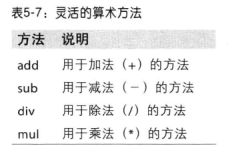

### DataFrame和Series间的运算

##### 广播（broadcasting）即逐行运算

In [320]:
arr=np.arange(12.).reshape(3,4)
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [321]:
arr[0]

array([0., 1., 2., 3.])

In [322]:
arr-arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

##### DataFrame与Series运算

In [331]:
frame=DataFrame(np.arange(12.).reshape(4,3),
               columns=list('bde'),
               index=['Utah','Ohio','Texas','Oregon'])
series=frame.iloc[0]

In [332]:
frame

b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0

In [333]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [334]:
frame-series

b    d    e
Utah    0.0  0.0  0.0
Ohio    3.0  3.0  3.0
Texas   6.0  6.0  6.0
Oregon  9.0  9.0  9.0

##### 若索引值在DataFrame的列或Series的索引中匹配不到，则两个参与运算的对象被重新索引以形成并集

In [342]:
series2=Series(np.arange(3),index=['b','e','f'])
series2

b    0
e    1
f    2
dtype: int32

In [343]:
frame

b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0

In [345]:
frame+series2

b   d     e   f
Utah    0.0 NaN   3.0 NaN
Ohio    3.0 NaN   6.0 NaN
Texas   6.0 NaN   9.0 NaN
Oregon  9.0 NaN  12.0 NaN

##### 匹配行且在列上广播（匹配行即以行坐标对其运算）

In [346]:
series3=frame['d']
frame

b     d     e
Utah    0.0   1.0   2.0
Ohio    3.0   4.0   5.0
Texas   6.0   7.0   8.0
Oregon  9.0  10.0  11.0

In [348]:
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [351]:
frame.sub(series3,axis=0)#axis代表匹配的轴

b    d    e
Utah   -1.0  0.0  1.0
Ohio   -1.0  0.0  1.0
Texas  -1.0  0.0  1.0
Oregon -1.0  0.0  1.0

### 函数应用

**NumPy的ufuncs也可用于操作pandas对象**

In [352]:
frame=DataFrame(np.random.randn(4,3),
                columns=list('bde'),
                index=['Utah','Ohio','Texas','Oregon'])
frame

b         d         e
Utah   -0.198764  0.272627 -0.730410
Ohio   -0.336911 -0.345261  1.530134
Texas  -0.814483 -0.168121 -0.443567
Oregon  1.194145  0.499060 -0.192966

In [353]:
np.abs(frame)

b         d         e
Utah    0.198764  0.272627  0.730410
Ohio    0.336911  0.345261  1.530134
Texas   0.814483  0.168121  0.443567
Oregon  1.194145  0.499060  0.192966

##### 将函数应用到各列或各行所形成的一维数组上

In [354]:
f=lambda x:x.max()-x.min()
frame.apply(f)#行与行间

b    2.008628
d    0.844320
e    2.260544
dtype: float64

In [356]:
frame.apply(f,axis=1)#列与列间

Utah      1.003037
Ohio      1.875395
Texas     0.646363
Oregon    1.387111
dtype: float64

##### apply接受的函数还可以返回由多个值组成的Series

In [357]:
def f(x):
    return Series([x.min(),x.max()],index=['min','max'])
frame

b         d         e
Utah   -0.198764  0.272627 -0.730410
Ohio   -0.336911 -0.345261  1.530134
Texas  -0.814483 -0.168121 -0.443567
Oregon  1.194145  0.499060 -0.192966

In [358]:
frame.apply(f)

b         d         e
min -0.814483 -0.345261 -0.730410
max  1.194145  0.499060  1.530134

##### 对元素作用的函数可传入applymap（）

In [362]:
formatx=lambda x:'%.2f'%x
frame

b         d         e
Utah   -0.198764  0.272627 -0.730410
Ohio   -0.336911 -0.345261  1.530134
Texas  -0.814483 -0.168121 -0.443567
Oregon  1.194145  0.499060 -0.192966

In [364]:
frame.applymap(formatx)

b      d      e
Utah    -0.20   0.27  -0.73
Ohio    -0.34  -0.35   1.53
Texas   -0.81  -0.17  -0.44
Oregon   1.19   0.50  -0.19

### 排序

##### Series对索引按字典顺序排序

**排序时任何缺失值默认放在Series末尾**

In [365]:
obj=Series(range(4),index=list('dabc'))
obj

d    0
a    1
b    2
c    3
dtype: int64

In [366]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

##### DataFrame对任意轴上索引进行排序

In [367]:
frame=DataFrame(np.arange(8).reshape(2,4),
               index=['three','one'],
               columns=list('dabc'))
frame

d  a  b  c
three  0  1  2  3
one    4  5  6  7

In [370]:
frame.sort_index()#行

d  a  b  c
one    4  5  6  7
three  0  1  2  3

In [371]:
frame.sort_index(axis=1)#列

a  b  c  d
three  1  2  3  0
one    5  6  7  4

##### 也可将序排序

In [372]:
frame.sort_index(axis=1,ascending=False)

d  c  b  a
three  0  3  2  1
one    4  7  6  5

##### 以某一列为主列进行排序sort_values(by=)

In [377]:
frame=DataFrame({
    'b':[4,7,-3,2],
    'a':[0,1,0,1]
})
frame

b  a
0  4  0
1  7  1
2 -3  0
3  2  1

In [378]:
frame.sort_values(by='b')

b  a
2 -3  0
3  2  1
0  4  0
1  7  1

### 排名

##### 数值越小排名越前(同样大小平均排名）

In [381]:
obj=Series([7,-5,7,4,2,0,4])
obj

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64

In [382]:
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

##### 按值在原数据出现顺序排名，破坏评级排名method='first'

In [383]:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

##### 降序排名ascending=False

In [384]:
obj.rank(ascending=False,method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

##### 其他method选项

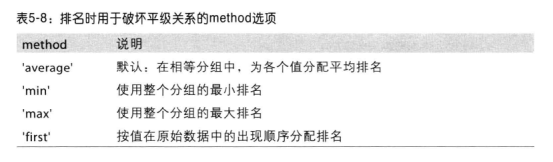

### 汇总和统计

In [393]:
df=DataFrame([[1.4,np.nan],[7.1,-4.5],
             [np.nan,np.nan],[0.75,-1.3]],
            index=list('abcd'),
            columns=['one','two'])
df

one  two
a  1.40  NaN
b  7.10 -4.5
c   NaN  NaN
d  0.75 -1.3

In [395]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [396]:
df.sum(axis=1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

##### 默认排除NaN值除非整行或整列为NaN，设置skipna=False可禁用排除NaN功能

In [399]:
df.mean(axis=1)

a    1.400
b    1.300
c      NaN
d   -0.275
dtype: float64

In [398]:
df.mean(axis=1,skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

##### 汇总统计describe（）

In [400]:
df

one  two
a  1.40  NaN
b  7.10 -4.5
c   NaN  NaN
d  0.75 -1.3

In [401]:
df.describe()

one       two
count  3.000000  2.000000
mean   3.083333 -2.900000
std    3.493685  2.262742
min    0.750000 -4.500000
25%    1.075000 -3.700000
50%    1.400000 -2.900000
75%    4.250000 -2.100000
max    7.100000 -1.300000

##### 非数值型describe

In [402]:
obj=Series(['a','a','b','c']*4)
obj

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object

In [403]:
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

##### 其他相关方法：
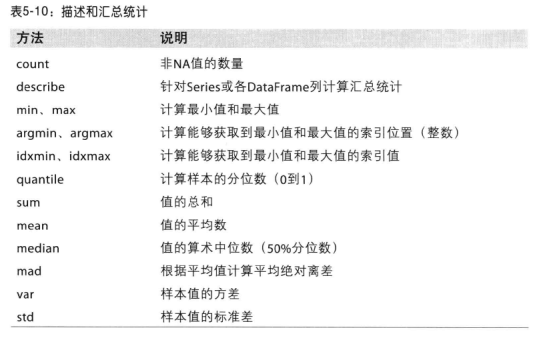

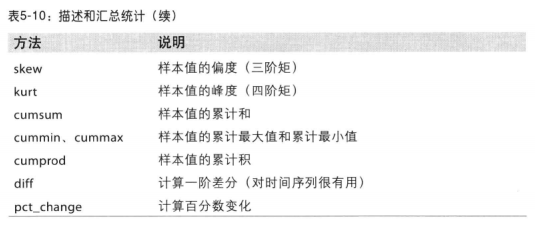

### 相关系数和协方差

In [405]:
price = pd.read_pickle('./examples/yahoo_price.pkl')
volume = pd.read_pickle('./examples/yahoo_volume.pkl')

In [406]:
price.head()

AAPL        GOOG         IBM       MSFT
Date                                                    
2010-01-04  27.990226  313.062468  113.304536  25.884104
2010-01-05  28.038618  311.683844  111.935822  25.892466
2010-01-06  27.592626  303.826685  111.208683  25.733566
2010-01-07  27.541619  296.753749  110.823732  25.465944
2010-01-08  27.724725  300.709808  111.935822  25.641571

##### 计算价格的百分数变化

In [408]:
returns=price.pct_change()
returns.tail()

AAPL      GOOG       IBM      MSFT
Date                                              
2016-10-17 -0.000680  0.001837  0.002072 -0.003483
2016-10-18 -0.000681  0.019616 -0.026168  0.007690
2016-10-19 -0.002979  0.007846  0.003583 -0.002255
2016-10-20 -0.000512 -0.005652  0.001719 -0.004867
2016-10-21 -0.003930  0.003011 -0.012474  0.042096

##### 计算协方差(MSFT和IBM之间的）

In [413]:
returns['MSFT'].corr(returns['IBM'])

0.4997636114415114

In [414]:
returns.MSFT.corr(returns.IBM)

0.4997636114415114

##### DataFrame形式返回相关系矩阵和协方差矩阵

In [415]:
returns.corr()

AAPL      GOOG       IBM      MSFT
AAPL  1.000000  0.407919  0.386817  0.389695
GOOG  0.407919  1.000000  0.405099  0.465919
IBM   0.386817  0.405099  1.000000  0.499764
MSFT  0.389695  0.465919  0.499764  1.000000

In [416]:
returns.cov()

AAPL      GOOG       IBM      MSFT
AAPL  0.000277  0.000107  0.000078  0.000095
GOOG  0.000107  0.000251  0.000078  0.000108
IBM   0.000078  0.000078  0.000146  0.000089
MSFT  0.000095  0.000108  0.000089  0.000215

##### 计算DataFrame每一列和一个Series之间的相关系数

In [417]:
returns.corrwith(returns.IBM)

AAPL    0.386817
GOOG    0.405099
IBM     1.000000
MSFT    0.499764
dtype: float64

##### 计算DataFrame之间按列名配对的相关系数

In [418]:
returns.head()

AAPL      GOOG       IBM      MSFT
Date                                              
2010-01-04       NaN       NaN       NaN       NaN
2010-01-05  0.001729 -0.004404 -0.012080  0.000323
2010-01-06 -0.015906 -0.025209 -0.006496 -0.006137
2010-01-07 -0.001849 -0.023280 -0.003462 -0.010400
2010-01-08  0.006648  0.013331  0.010035  0.006897

In [419]:
volume.head()

AAPL      GOOG      IBM      MSFT
Date                                              
2010-01-04  123432400   3927000  6155300  38409100
2010-01-05  150476200   6031900  6841400  49749600
2010-01-06  138040000   7987100  5605300  58182400
2010-01-07  119282800  12876600  5840600  50559700
2010-01-08  111902700   9483900  4197200  51197400

In [420]:
returns.corrwith(volume)

AAPL   -0.075565
GOOG   -0.007067
IBM    -0.204849
MSFT   -0.092950
dtype: float64

### 唯一值、值计数、成员资格

##### 唯一值

In [422]:
obj=Series(list('cadaabbcc'))
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [425]:
uniques=obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

##### 统计各值出现频率

In [426]:
obj.value_counts()

a    3
c    3
b    2
d    1
dtype: int64

In [429]:
pd.value_counts(obj.values,sort=False)#sort=False取消排序

c    3
d    1
b    2
a    3
dtype: int64

##### 判断成员资格

In [430]:
mask=obj.isin(['b','c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

### 缺失数据处理

##### dropna滤除缺失

In [431]:
from numpy import nan as NA
data=Series([1,NA,3.5,NA,7])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [432]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

##### 布尔索引滤除

In [433]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

##### dropna默认丢弃DataFrame中含有任何缺失值的行

In [434]:
data=DataFrame([[1.,6.5,3.],[1.,NA,NA],
               [NA,NA,NA],[NA,6.5,3.]])
data

0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0

In [436]:
cleaned=data.dropna()
cleaned

0    1    2
0  1.0  6.5  3.0

##### 只丢弃全为NaN的行（参数how='all'）

In [437]:
data.dropna(how='all')

0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
3  NaN  6.5  3.0

##### 丢弃列

In [438]:
data.dropna(axis=1,how='all')

0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0

##### 填充缺失

In [442]:
df=DataFrame(np.random.randn(7,3))
df.loc[:4,1]=NA
df.loc[:2,2]=NA
df

0         1         2
0 -0.864353       NaN       NaN
1  0.173123       NaN       NaN
2  0.384557       NaN       NaN
3 -0.401707       NaN -2.272322
4 -0.378727       NaN -0.800317
5 -0.333184  0.009919 -0.773231
6 -1.203950  1.026744 -0.843237

In [444]:
df.fillna(0)

0         1         2
0 -0.864353  0.000000  0.000000
1  0.173123  0.000000  0.000000
2  0.384557  0.000000  0.000000
3 -0.401707  0.000000 -2.272322
4 -0.378727  0.000000 -0.800317
5 -0.333184  0.009919 -0.773231
6 -1.203950  1.026744 -0.843237

##### 对不同列的NaN填充不同值

In [445]:
df.fillna({1:0.5,2:-1})

0         1         2
0 -0.864353  0.500000 -1.000000
1  0.173123  0.500000 -1.000000
2  0.384557  0.500000 -1.000000
3 -0.401707  0.500000 -2.272322
4 -0.378727  0.500000 -0.800317
5 -0.333184  0.009919 -0.773231
6 -1.203950  1.026744 -0.843237

##### fillna返回新对象，传入参数inplace=True直接改变原对象

In [446]:
_=df.fillna(0,inplace=True)
df

0         1         2
0 -0.864353  0.000000  0.000000
1  0.173123  0.000000  0.000000
2  0.384557  0.000000  0.000000
3 -0.401707  0.000000 -2.272322
4 -0.378727  0.000000 -0.800317
5 -0.333184  0.009919 -0.773231
6 -1.203950  1.026744 -0.843237

##### 前向或后向填充

In [447]:
df=DataFrame(np.random.randn(7,3))
df.loc[:4,1]=NA
df.loc[:2,2]=NA
df

0         1         2
0  0.507900       NaN       NaN
1  0.531015       NaN       NaN
2  0.560521       NaN       NaN
3 -1.656466       NaN -1.497597
4 -0.102688       NaN  0.032406
5 -1.970144 -1.731361 -1.556030
6  0.233420 -0.131200 -0.569508

In [449]:
df.fillna(method='bfill')

0         1         2
0  0.507900 -1.731361 -1.497597
1  0.531015 -1.731361 -1.497597
2  0.560521 -1.731361 -1.497597
3 -1.656466 -1.731361 -1.497597
4 -0.102688 -1.731361  0.032406
5 -1.970144 -1.731361 -1.556030
6  0.233420 -0.131200 -0.569508

### 层次化索引

In [451]:
data=Series(np.random.randn(10),
           index=[list('aaabbbccdd'),
           [1,2,3,1,2,3,1,2,2,3]])
data

a  1    0.760626
   2   -0.047850
   3   -0.849289
b  1   -0.671303
   2   -0.620089
   3    1.403592
c  1    0.175241
   2    0.301549
d  2    0.170220
   3    0.630555
dtype: float64

In [452]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 2),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

##### 对象选取

In [453]:
data

a  1    0.760626
   2   -0.047850
   3   -0.849289
b  1   -0.671303
   2   -0.620089
   3    1.403592
c  1    0.175241
   2    0.301549
d  2    0.170220
   3    0.630555
dtype: float64

In [454]:
data['b']

1   -0.671303
2   -0.620089
3    1.403592
dtype: float64

In [455]:
data['b':'d']

b  1   -0.671303
   2   -0.620089
   3    1.403592
c  1    0.175241
   2    0.301549
d  2    0.170220
   3    0.630555
dtype: float64

In [456]:
data.loc[['b','d']]

b  1   -0.671303
   2   -0.620089
   3    1.403592
d  2    0.170220
   3    0.630555
dtype: float64

In [459]:
data[:,2]

a   -0.047850
b   -0.620089
c    0.301549
d    0.170220
dtype: float64

##### unstack()方法生成对应DataFrame,逆运算stack()

In [460]:
data

a  1    0.760626
   2   -0.047850
   3   -0.849289
b  1   -0.671303
   2   -0.620089
   3    1.403592
c  1    0.175241
   2    0.301549
d  2    0.170220
   3    0.630555
dtype: float64

In [461]:
data.unstack()

1         2         3
a  0.760626 -0.047850 -0.849289
b -0.671303 -0.620089  1.403592
c  0.175241  0.301549       NaN
d       NaN  0.170220  0.630555

In [462]:
data.unstack().stack()

a  1    0.760626
   2   -0.047850
   3   -0.849289
b  1   -0.671303
   2   -0.620089
   3    1.403592
c  1    0.175241
   2    0.301549
d  2    0.170220
   3    0.630555
dtype: float64

##### DataFrame行和列索引的分层

In [463]:
frame=DataFrame(np.arange(12).reshape(4,3),
               index=[list('aabb'),[1,2,1,2]],
               columns=[['Ohio','Ohio','Colorado'],
                       ['Green','Red','Green']])
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

##### 给各层命名

In [464]:
frame.index.names=['key1','key2']
frame

Ohio     Colorado
          Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [466]:
frame.columns.names=['stste','color']
frame

stste      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

##### 重排分级先后顺序

In [467]:
frame.swaplevel('key1','key2')

stste      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

##### 根据级别汇总统计

In [473]:
frame

stste      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [474]:
frame.sum(level='key2')

stste  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [475]:
frame.sum(level='color',axis=1)

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

### 使用DataFrame的列

##### 将列的信息转化为行索引

In [476]:
frame=DataFrame({
    'a':range(7),
    'b':range(7,0,-1),
    'c':['one','one','one','two','two','two','two'],
    'd':[0,1,2,0,1,2,3]
})
frame

a  b    c  d
0  0  7  one  0
1  1  6  one  1
2  2  5  one  2
3  3  4  two  0
4  4  3  two  1
5  5  2  two  2
6  6  1  two  3

In [478]:
frame2=frame.set_index(['c','d'])
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

##### 转化行索引同时保留列

In [479]:
frame.set_index(['c','d'],drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

##### 将层次化索引转换为列

In [480]:
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [481]:
frame2.reset_index()

c  d  a  b
0  one  0  0  7
1  one  1  1  6
2  one  2  2  5
3  two  0  3  4
4  two  1  4  3
5  two  2  5  2
6  two  3  6  1

***

***

***

## 加载、存储数据

### 文本格式读取、写入数据

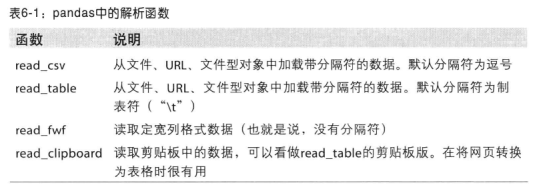

##### read_csv打开csv文件

In [482]:
df=pd.read_csv('./examples/ex1.csv')
df

a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo

##### read_table打开csv文件，需要指定分隔符sep=','

In [484]:
df=pd.read_table('./examples/ex1.csv',sep=',')
df

a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo

##### 为没有标题行的文件默认分配

In [485]:
pd.read_csv('./examples/ex2.csv',header=None)

0   1   2   3      4
0  1   2   3   4  hello
1  5   6   7   8  world
2  9  10  11  12    foo

##### 手动分配

In [486]:
pd.read_csv('./examples/ex2.csv',names=['a','b','c','d','message'])

a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo

##### 选择一列数据作为索引

In [487]:
names=['a','b','c','d','message']
pd.read_csv('./examples/ex2.csv',names=names,index_col='message')

a   b   c   d
message               
hello    1   2   3   4
world    5   6   7   8
foo      9  10  11  12

##### 选择多个列做层次化索引

In [489]:
parsed=pd.read_csv('./examples/csv_mindex.csv',index_col=['key1', 'key2'])
parsed

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

##### 利用正则读取其他分隔符

In [491]:
with open('./examples/ex3.txt') as txt:
    file=list(txt)
file

['            A         B         C\n',
 'aaa -0.264438 -1.026059 -0.619500\n',
 'bbb  0.927272  0.302904 -0.032399\n',
 'ccc -0.264273 -0.386314 -0.217601\n',
 'ddd -0.871858 -0.348382  1.100491\n']

**由于此处列名比数据行数量少，函数推测第一列为索引**

In [493]:
result=pd.read_table('./examples/ex3.txt', sep='\s+')#\s表示任意一个空白字符
result

A         B         C
aaa -0.264438 -1.026059 -0.619500
bbb  0.927272  0.302904 -0.032399
ccc -0.264273 -0.386314 -0.217601
ddd -0.871858 -0.348382  1.100491

##### skiprow跳过指定多行header

In [495]:
pd.read_csv('./examples/ex4.csv')

# hey!
a                                                  b        c   d    message
# just wanted to make things more difficult for... NaN      NaN NaN      NaN
# who reads CSV files with computers                anyway? NaN NaN      NaN
1                                                  2        3   4      hello
5                                                  6        7   8      world
9                                                  10       11  12       foo

In [497]:
pd.read_csv('./examples/ex4.csv', skiprows=[0, 2, 3])

a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo

##### 默认标记缺失值

In [504]:
!type .\examples\ex5.csv

something,a,b,c,d,message
one,1,2,3,4,NA
two,5,6,,8,world
three,9,10,11,12,foo


In [505]:
result = pd.read_csv('./examples/ex5.csv')
result

something  a   b     c   d message
0       one  1   2   3.0   4     NaN
1       two  5   6   NaN   8   world
2     three  9  10  11.0  12     foo

##### na_values将传入的字符串识别为NA(传入list)

In [507]:
result = pd.read_csv('./examples/ex5.csv', na_values=['foo'])
result

something  a   b     c   d message
0       one  1   2   3.0   4     NaN
1       two  5   6   NaN   8   world
2     three  9  10  11.0  12     NaN

##### 给不同column设定不同缺失值

In [508]:
sentinels={
    'message':['foo','NA'],
    'something':['two']
}
pd.read_csv('./examples/ex5.csv',na_values=sentinels)

something  a   b     c   d message
0       one  1   2   3.0   4     NaN
1       NaN  5   6   NaN   8   world
2     three  9  10  11.0  12     NaN

##### 其他参数：
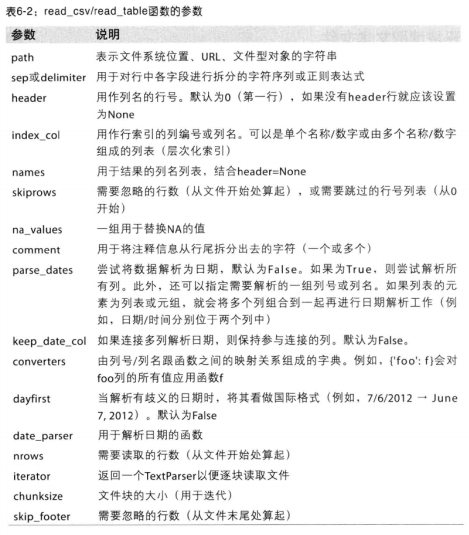

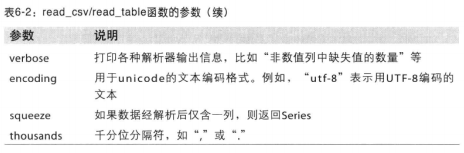

### 逐块读取文件

##### 设置单次显示数量

In [509]:
pd.options.display.max_rows = 10

In [510]:
result = pd.read_csv('./examples/ex6.csv')
result

one       two     three      four key
0     0.467976 -0.038649 -0.295344 -1.824726   L
1    -0.358893  1.404453  0.704965 -0.200638   B
2    -0.501840  0.659254 -0.421691 -0.057688   G
3     0.204886  1.074134  1.388361 -0.982404   R
4     0.354628 -0.133116  0.283763 -0.837063   Q
...        ...       ...       ...       ...  ..
9995  2.311896 -0.417070 -1.409599 -0.515821   L
9996 -0.479893 -0.650419  0.745152 -0.646038   E
9997  0.523331  0.787112  0.486066  1.093156   K
9998 -0.362559  0.598894 -1.843201  0.887292   G
9999 -0.096376 -1.012999 -0.657431 -0.573315   0

[10000 rows x 5 columns]

##### nrows指定读取行数

In [511]:
pd.read_csv('./examples/ex6.csv',nrows=5)

one       two     three      four key
0  0.467976 -0.038649 -0.295344 -1.824726   L
1 -0.358893  1.404453  0.704965 -0.200638   B
2 -0.501840  0.659254 -0.421691 -0.057688   G
3  0.204886  1.074134  1.388361 -0.982404   R
4  0.354628 -0.133116  0.283763 -0.837063   Q

##### 逐块读取

**设置chunksize行数**

In [512]:
chunker=pd.read_csv('./examples/ex6.csv',chunksize=1000)
chunker

In [513]:
tot = pd.Series([])
for piece in chunker:
    tot = tot.add(piece['key'].value_counts(), fill_value=0)
    
tot = tot.sort_values(ascending=False)

In [514]:
tot

E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
     ...  
5    157.0
2    152.0
0    151.0
9    150.0
1    146.0
Length: 36, dtype: float64

##### get_chunk返回任意大小数据片段

In [516]:
chunker = pd.read_csv('./examples/ex6.csv', chunksize=1000)

chunker.get_chunk(10)

one       two     three      four key
0  0.467976 -0.038649 -0.295344 -1.824726   L
1 -0.358893  1.404453  0.704965 -0.200638   B
2 -0.501840  0.659254 -0.421691 -0.057688   G
3  0.204886  1.074134  1.388361 -0.982404   R
4  0.354628 -0.133116  0.283763 -0.837063   Q
5  1.817480  0.742273  0.419395 -2.251035   Q
6 -0.776764  0.935518 -0.332872 -1.875641   U
7 -0.913135  1.530624 -0.572657  0.477252   K
8  0.358480 -0.497572 -0.367016  0.507702   S
9 -1.740877 -1.160417 -1.637830  2.172201   G

In [517]:
chunker.get_chunk(10)

one       two     three      four key
10  0.240564 -0.328249  1.252155  1.072796   8
11  0.764018  1.165476 -0.639544  1.495258   R
12  0.571035 -0.310537  0.582437 -0.298765   1
13  2.317658  0.430710 -1.334216  0.199679   P
14  1.547771 -1.119753 -2.277634  0.329586   J
15 -1.310608  0.401719 -1.000987  1.156708   E
16 -0.088496  0.634712  0.153324  0.415335   B
17 -0.018663 -0.247487 -1.446522  0.750938   A
18 -0.070127 -1.579097  0.120892  0.671432   F
19 -0.194678 -0.492039  2.359605  0.319810   H

### 写入数据到文本

##### 输出为csv格式to_csv

In [518]:
data=pd.read_csv('./examples/ex5.csv')
data

something  a   b     c   d message
0       one  1   2   3.0   4     NaN
1       two  5   6   NaN   8   world
2     three  9  10  11.0  12     foo

In [519]:
data.to_csv('./examples/out.csv')

In [520]:
!type .\examples\out.csv

,something,a,b,c,d,message
0,one,1,2,3.0,4,
1,two,5,6,,8,world
2,three,9,10,11.0,12,foo


##### 采用其他分隔符

In [524]:
import sys
data.to_csv(sys.stdout,sep='|')#输出到标准输出，即打印

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo


##### 展示缺失值（默认为空字符串）

In [527]:
data.to_csv(sys.stdout,sep='|',na_rep='NULL')

|something|a|b|c|d|message
0|one|1|2|3.0|4|NULL
1|two|5|6|NULL|8|world
2|three|9|10|11.0|12|foo


##### 禁用行列标签

In [529]:
data.to_csv(sys.stdout,sep='|',na_rep='NULL',header=False,index=False)

one|1|2|3.0|4|NULL
two|5|6|NULL|8|world
three|9|10|11.0|12|foo


##### 仅展示部分列（有序）

In [531]:
data.to_csv(sys.stdout,sep='|',na_rep='NULL',index=False,columns=['b','c','a'])

b|c|a
2|3.0|1
6|NULL|5
10|11.0|9


### csv方言dialect

In [536]:
import csv

class my_dialect(csv.Dialect):
    lineterminator='\n'
    delimiter=';'
    quotechar='"'
    quoting=csv.QUOTE_MINIMAL
with open('./examples/ex7.csv') as f:    
    reader=csv.reader(f,dialect=my_dialect)
    for line in reader:
        print(line)

['a,"b","c"']
['1,"2","3"']
['1,"2","3"']


##### 也可以直接使用参数，不定义子类

In [ ]:
reader=csv.reader(f,delimiter='|')

##### 其他参数：
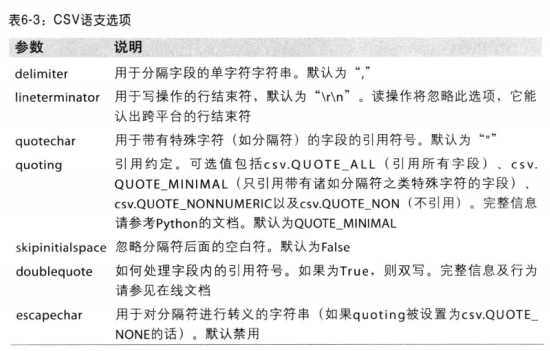

### JSON数据

##### json字符串转化为py格式loads（）

In [537]:
obj = """ 
{"name": "Wes", 
 "places_lived": ["United States", "Spain", "Germany"], 
 "pet": null, "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]}, 
                           {"name": "Katie", "age": 38, 
                            "pets": ["Sixes", "Stache", "Cisco"]}] 
} 
"""

In [538]:
import json

result=json.loads(obj)
result

{'name': 'Wes',
 'places_lived': ['United States', 'Spain', 'Germany'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']},
  {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]}

##### py对象转化为json格式dumps（）

In [539]:
asjson=json.dumps(result)
asjson

'{"name": "Wes", "places_lived": ["United States", "Spain", "Germany"], "pet": null, "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]}, {"name": "Katie", "age": 38, "pets": ["Sixes", "Stache", "Cisco"]}]}'

##### 将转化为py对象的数据构造为DataFrame

In [540]:
result

{'name': 'Wes',
 'places_lived': ['United States', 'Spain', 'Germany'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']},
  {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]}

In [543]:
siblings=DataFrame(result['siblings'],columns=['name','age','pets'])
siblings

name  age                    pets
0  Scott   30            [Zeus, Zuko]
1  Katie   38  [Sixes, Stache, Cisco]

In [545]:
siblings=DataFrame(result['siblings'],columns=['name','age'])
siblings

name  age
0  Scott   30
1  Katie   38

##### 直接将json文件读取为Series或DataFrame

In [546]:
!type .\examples\example.json

[{"a": 1, "b": 2, "c": 3},
 {"a": 4, "b": 5, "c": 6},
 {"a": 7, "b": 8, "c": 9}]


In [550]:
data=pd.read_json('./examples/example.json')
data

a  b  c
0  1  2  3
1  4  5  6
2  7  8  9

##### 输出为json

In [551]:
data.to_json

<bound method NDFrame.to_json of    a  b  c
0  1  2  3
1  4  5  6
2  7  8  9>

### XML和XML

##### read_html默认搜索并解析含有< tagble>tag的表格型数据

In [555]:
tables = pd.read_html('./examples/fdic_failed_bank_list.html')
tables

[                             Bank Name             City  ST   CERT  \
 0                          Allied Bank         Mulberry  AR     91   
 1         The Woodbury Banking Company         Woodbury  GA  11297   
 2               First CornerStone Bank  King of Prussia  PA  35312   
 3                   Trust Company Bank          Memphis  TN   9956   
 4           North Milwaukee State Bank        Milwaukee  WI  20364   
 ..                                 ...              ...  ..    ...   
 542                 Superior Bank, FSB         Hinsdale  IL  32646   
 543                Malta National Bank            Malta  OH   6629   
 544    First Alliance Bank & Trust Co.       Manchester  NH  34264   
 545  National State Bank of Metropolis       Metropolis  IL   3815   
 546                   Bank of Honolulu         Honolulu  HI  21029   
 
                    Acquiring Institution        Closing Date  \
 0                           Today's Bank  September 23, 2016   
 1              

In [557]:
print(type(tables))
len(tables)

<class 'list'>


1

In [556]:
failures=tables[0]
failures.head()

Bank Name             City  ST   CERT  \
0                   Allied Bank         Mulberry  AR     91   
1  The Woodbury Banking Company         Woodbury  GA  11297   
2        First CornerStone Bank  King of Prussia  PA  35312   
3            Trust Company Bank          Memphis  TN   9956   
4    North Milwaukee State Bank        Milwaukee  WI  20364   

                 Acquiring Institution        Closing Date       Updated Date  
0                         Today's Bank  September 23, 2016  November 17, 2016  
1                          United Bank     August 19, 2016  November 17, 2016  
2  First-Citizens Bank & Trust Company         May 6, 2016  September 6, 2016  
3           The Bank of Fayette County      April 29, 2016  September 6, 2016  
4  First-Citizens Bank & Trust Company      March 11, 2016      June 16, 2016

##### lxml解析XML格式文件

In [560]:
from lxml import objectify

path = './datasets/mta_perf/Performance_MNR.xml'
parsed = objectify.parse(open(path))
root = parsed.getroot()#返回一个指向根节点的指针
root

<Element PERFORMANCE at 0x18504678a88>

**root.INDICATOR返回一个生成器，每次调用产生一个< INDICATOR>XML元素**

In [562]:
data = []

skip_fields = ['PARENT_SEQ', 'INDICATOR_SEQ', 
               'DESIRED_CHANGE', 'DECIMAL_PLACES']#不需要的标签

for elt in root.INDICATOR:
    el_data = {}
    for child in elt.getchildren():
        if child.tag in skip_fields:
            continue
        el_data[child.tag] = child.pyval
    data.append(el_data)
    
data

[{'AGENCY_NAME': 'Metro-North Railroad',
  'INDICATOR_NAME': 'On-Time Performance (West of Hudson)',
  'DESCRIPTION': 'Percent of commuter trains that arrive at their destinations within 5 minutes and 59 seconds of the scheduled time. West of Hudson services include the Pascack Valley and Port Jervis lines. Metro-North Railroad contracts with New Jersey Transit to operate service on these lines.\n',
  'PERIOD_YEAR': 2008,
  'PERIOD_MONTH': 1,
  'CATEGORY': 'Service Indicators',
  'FREQUENCY': 'M',
  'INDICATOR_UNIT': '%',
  'YTD_TARGET': 95.0,
  'YTD_ACTUAL': 96.9,
  'MONTHLY_TARGET': 95.0,
  'MONTHLY_ACTUAL': 96.9},
 {'AGENCY_NAME': 'Metro-North Railroad',
  'INDICATOR_NAME': 'On-Time Performance (West of Hudson)',
  'DESCRIPTION': 'Percent of commuter trains that arrive at their destinations within 5 minutes and 59 seconds of the scheduled time. West of Hudson services include the Pascack Valley and Port Jervis lines. Metro-North Railroad contracts with New Jersey Transit to operate 

In [563]:
perf=pd.DataFrame(data)
perf

AGENCY_NAME                        INDICATOR_NAME  \
0    Metro-North Railroad  On-Time Performance (West of Hudson)   
1    Metro-North Railroad  On-Time Performance (West of Hudson)   
2    Metro-North Railroad  On-Time Performance (West of Hudson)   
3    Metro-North Railroad  On-Time Performance (West of Hudson)   
4    Metro-North Railroad  On-Time Performance (West of Hudson)   
..                    ...                                   ...   
643  Metro-North Railroad                Escalator Availability   
644  Metro-North Railroad                Escalator Availability   
645  Metro-North Railroad                Escalator Availability   
646  Metro-North Railroad                Escalator Availability   
647  Metro-North Railroad                Escalator Availability   

                                           DESCRIPTION  PERIOD_YEAR  \
0    Percent of commuter trains that arrive at thei...         2008   
1    Percent of commuter trains that arrive at thei...         2008   
2    Percent of commuter trains that arrive at thei...         2008   
3    Percent of commuter trains that arrive at thei...         2008   
4    Percent of commuter trains that arrive at thei...         2008   
..                                                 ...          ...   
643  Percent of the time that escalators are operat...         2011   
644  Percent of the time that escalators are operat...         2011   
645  Percent of the time that escalators are operat...         2011   
646  Percent of the time that escalators are operat...         2011   
647  Percent of the time that escalators are operat...         2011   

     PERIOD_MONTH            CATEGORY FREQUENCY INDICATOR_UNIT YTD_TARGET  \
0               1  Service Indicators         M              %         95   
1               2  Service Indicators         M              %         95   
2               3  Service Indicators         M              %         95   
3               4  Service Indicators         M              %         95   
4               5  Service Indicators         M              %         95   
..            ...                 ...       ...            ...        ...   
643             8  Service Indicators         M              %         97   
644             9  Service Indicators         M              %         97   
645            10  Service Indicators         M              %         97   
646            11  Service Indicators         M              %         97   
647            12  Service Indicators         M              %         97   

    YTD_ACTUAL MONTHLY_TARGET MONTHLY_ACTUAL  
0         96.9             95           96.9  
1           96             95             95  
2         96.3             95           96.9  
3         96.8             95           98.3  
4         96.6             95           95.8  
..         ...            ...            ...  
643                        97                 
644                        97                 
645                        97                 
646                        97                 
647                        97                 

[648 rows x 12 columns]

### 二进制数据格式

##### pandas对象的to_pickle方法将数据以pickle格式保存

In [7]:
frame=pd.read_csv('./examples/ex1.csv')
frame

a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo

In [569]:
frame.to_pickle('./examples/frame_pickle')

In [567]:
!dir .\examples\

 驱动器 C 中的卷是 Windows
 卷的序列号是 AA85-59B3

 C:\Users\1234\lynn2019xxy-pydata-notebook-master\pydata-notebook\examples 的目录

2020/04/17  21:58    <DIR>          .
2020/04/17  21:58    <DIR>          ..
2018/04/21  20:53               514 array_archive.npz
2018/04/21  20:53               384 array_compressed.npz
2018/04/21  20:53               224 array_ex.txt
2018/04/21  20:53               373 cprof_example.py
2018/04/21  20:53               111 csv_mindex.csv
2018/04/21  20:53                58 ex1.csv
2018/04/21  20:53             5,529 ex1.xlsx
2018/04/21  20:53                42 ex2.csv
2018/04/21  20:53             5,529 ex2.xlsx
2018/04/21  20:53               169 ex3.csv
2018/04/21  20:53               170 ex3.txt
2018/04/21  20:53               163 ex4.csv
2018/04/21  20:53                78 ex5.csv
2018/04/21  20:53           626,863 ex6.csv
2018/04/21  20:53                36 ex7.csv
2018/04/21  20:53                81 example.json
2018/04/21  20:53           281,823 fdic_failed_b

##### read_pickle方法读取任何pickle文件

In [570]:
pd.read_pickle('./examples/frame_pickle')

a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo

### 读写excel

##### 读取read_excel

In [3]:
import pandas as pd
xlsx = pd.ExcelFile('./examples/ex1.xlsx')
xlsx

In [5]:
pd.read_excel(xlsx,'Sheet1')

Unnamed: 0  a   b   c   d message
0           0  1   2   3   4   hello
1           1  5   6   7   8   world
2           2  9  10  11  12     foo

##### 写为excel，利用ExcelWriter

In [8]:
frame

a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo

In [9]:
writer=pd.ExcelWriter('./examples/ex2.xlsx')
frame.to_excel(writer,'Sheet1')
writer.save()

##### 写为excel，利用to_excel

In [12]:
frame.to_excel('./examples/ex2.xlsx','Sheet1')

### 网络相关的API交互

In [17]:
import requests

url='https://api.github.com/repos/pandas-dev/pandas/issues'
resp=requests.get(url)
resp

<Response [200]>

##### json方法返回一个dict列表，包含可解析为py对象的JSON

In [24]:
data=resp.json()
data[0]['title']

'TST: check freq on series.index in assert_series_equal'

##### 提取需要的标签转化为DataFrame

In [25]:
issues = pd.DataFrame(data, columns=['number', 'title', 
                                    'labels', 'state'])
issues

number                                              title  \
0    33815  TST: check freq on series.index in assert_seri...   
1    33814  BUG: Merge between partial index and index fai...   
2    33810                TST: add Feather V2 round-trip test   
3    33809      BUG: Don't raise in DataFrame.corr with pd.NA   
4    33807  API: always treat tuples as object-dtype-scala...   
5    33805  BUG: can't concatenate DataFrame with Series w...   
6    33804  BUG: support corr and cov functions for custom...   
7    33803     BUG:  .corr() fails when input is Int64Dtype()   
8    33802  Why not support `GroupBy.rank(numeric_only=Fal...   
9    33795  BUG: quantile with list of quantiles fails on ...   
10   33793           DOC: Fix typos and improve parts of docs   
11   33791  DOC: Link to table schema and remove reference...   
12   33790          API: Dispatch mechanism for EA reductions   
13   33787  BUG: Pandas 1.0.x read_json unable to convert ...   
14   33786  BUG: DataFrame with index having tzlocal() tim...   
15   33782  BUG: Add warning if rows have more columns tha...   
16   33780  API: Should indexing on columns give views or ...   
17   33778   BUG: Undocumented behaviour of MultiIndex.rename   
18   33775  BUG: Changing way of applying numpy functions ...   
19   33771  [#33770] bug fix to prevent ExtensionArrays fr...   
20   33770  BUG: ExtensionArrays whose elements are non-nu...   
21   33767           Fix missing tick labels on twinned axes.   
22   33765  BUG: RecursionError when aligning column Multi...   
23   33761  REGR: fix DataFrame reduction with EA columns ...   
24   33760  BUG: inconsistent median support for datetimel...   
25   33759  Can we reduce the size of file generated with ...   
26   33752  BUG: weekday property raises TypeError in grou...   
27   33749            BUG: Fix mixed datetime dtype inference   
28   33748  BUG: to_hdf and HDFStore raise KeyError for Da...   
29   33746  QST: Does ExcelWriter accept a file object? Wh...   

                                               labels state  
0                                                  []  open  
1   [{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...  open  
2   [{'id': 685114413, 'node_id': 'MDU6TGFiZWw2ODU...  open  
3   [{'id': 1817503692, 'node_id': 'MDU6TGFiZWwxOD...  open  
4   [{'id': 1741841389, 'node_id': 'MDU6TGFiZWwxNz...  open  
5   [{'id': 2822098, 'node_id': 'MDU6TGFiZWwyODIyM...  open  
6   [{'id': 1045950827, 'node_id': 'MDU6TGFiZWwxMD...  open  
7   [{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...  open  
8   [{'id': 76812, 'node_id': 'MDU6TGFiZWw3NjgxMg=...  open  
9   [{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...  open  
10  [{'id': 134699, 'node_id': 'MDU6TGFiZWwxMzQ2OT...  open  
11  [{'id': 134699, 'node_id': 'MDU6TGFiZWwxMzQ2OT...  open  
12  [{'id': 35818298, 'node_id': 'MDU6TGFiZWwzNTgx...  open  
13  [{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...  open  
14  [{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...  open  
15                                                 []  open  
16  [{'id': 35818298, 'node_id': 'MDU6TGFiZWwzNTgx...  open  
17  [{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...  open  
18  [{'id': 8935311, 'node_id': 'MDU6TGFiZWw4OTM1M...  open  
19  [{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...  open  
20  [{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...  open  
21  [{'id': 2413328, 'node_id': 'MDU6TGFiZWwyNDEzM...  open  
22  [{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...  open  
23  [{'id': 849023693, 'node_id': 'MDU6TGFiZWw4NDk...  open  
24  [{'id': 1741841389, 'node_id': 'MDU6TGFiZWwxNz...  open  
25  [{'id': 1954720290, 'node_id': 'MDU6TGFiZWwxOT...  open  
26  [{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...  open  
27  [{'id': 76865106, 'node_id': 'MDU6TGFiZWw3Njg2...  open  
28  [{'id': 76812, 'node_id': 'MDU6TGFiZWw3NjgxMg=...  open  
29  [{'id': 47229171, 'node_id': 'MDU6TGFiZWw0NzIy...  open

***

***

***

## 数据规整化

### DataFrame合并

##### 多对一合并

In [38]:
df1=DataFrame({
    'key':list('bbacaab'),
    'data1':range(7)
})
df1

key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   a      5
6   b      6

In [37]:
df2=DataFrame({
    'key':list('abd'),
    'data2':range(3)
})
df2#各个key只有一个值

key  data2
0   a      0
1   b      1
2   d      2

In [30]:
pd.merge(df1,df2)

key  data1  data2
0   b      0      1
1   b      1      1
2   b      6      1
3   a      2      0
4   a      4      0
5   a      5      0

##### 指定列进行连接,未指定则默认用重叠列

In [31]:
pd.merge(df1,df2,on='key')

key  data1  data2
0   b      0      1
1   b      1      1
2   b      6      1
3   a      2      0
4   a      4      0
5   a      5      0

##### 两个对象列名不同可分别指定

In [34]:
df3=DataFrame({
    'lkey':list('bbacaab'),
    'data1':range(7)
})
df3

lkey  data1
0    b      0
1    b      1
2    a      2
3    c      3
4    a      4
5    a      5
6    b      6

In [35]:
df4=DataFrame({
    'rkey':list('abd'),
    'data2':range(3)
})
df4

rkey  data2
0    a      0
1    b      1
2    d      2

In [36]:
pd.merge(df3,df4,left_on='lkey',right_on='rkey')

lkey  data1 rkey  data2
0    b      0    b      1
1    b      1    b      1
2    b      6    b      1
3    a      2    a      0
4    a      4    a      0
5    a      5    a      0

##### 合并取并集（默认为交集）

In [39]:
pd.merge(df1,df2,how='outer')

key  data1  data2
0   b    0.0    1.0
1   b    1.0    1.0
2   b    6.0    1.0
3   a    2.0    0.0
4   a    4.0    0.0
5   a    5.0    0.0
6   c    3.0    NaN
7   d    NaN    2.0

##### 多对多合并

In [40]:
df1=DataFrame({
    'key':list('bbacab'),
    'data1':range(6)
})
df1

key  data
0   b     0
1   b     1
2   a     2
3   c     3
4   a     4
5   b     5

In [41]:
df2=DataFrame({
    'key':list('ababd'),
    'data2':range(5)
})
df2#此时有多个重复key

key  data2
0   a      0
1   b      1
2   a      2
3   b      3
4   d      4

In [43]:
pd.merge(df1,df2,on='key',how='left')

key  data  data2
0    b     0    1.0
1    b     0    3.0
2    b     1    1.0
3    b     1    3.0
4    a     2    0.0
5    a     2    2.0
6    c     3    NaN
7    a     4    0.0
8    a     4    2.0
9    b     5    1.0
10   b     5    3.0

**产生的是笛卡尔积**

##### 根据多个键进行合并

In [44]:
left=DataFrame({
    'key1': ['foo', 'foo', 'bar'], 
    'key2': ['one', 'two', 'one'], 
    'lval': [1, 2, 3]
})
left

key1 key2  lval
0  foo  one     1
1  foo  two     2
2  bar  one     3

In [45]:
right = pd.DataFrame({
    'key1': ['foo', 'foo', 'bar', 'bar'], 
    'key2': ['one', 'one', 'one', 'two'], 
    'rval': [4, 5, 6, 7]
})
right

key1 key2  rval
0  foo  one     4
1  foo  one     5
2  bar  one     6
3  bar  two     7

In [46]:
pd.merge(left,right,on=['key1','key2'],how='outer')

key1 key2  lval  rval
0  foo  one   1.0   4.0
1  foo  one   1.0   5.0
2  foo  two   2.0   NaN
3  bar  one   3.0   6.0
4  bar  two   NaN   7.0

##### 处理重复列名

In [47]:
left

key1 key2  lval
0  foo  one     1
1  foo  two     2
2  bar  one     3

In [48]:
right

key1 key2  rval
0  foo  one     4
1  foo  one     5
2  bar  one     6
3  bar  two     7

In [50]:
pd.merge(left,right,on='key1')#即以key1为基准参照进行合并

key1 key2_x  lval key2_y  rval
0  foo    one     1    one     4
1  foo    one     1    one     5
2  foo    two     2    one     4
3  foo    two     2    one     5
4  bar    one     3    one     6
5  bar    one     3    two     7

In [51]:
pd.merge(left,right,on='key1',suffixes=('_left','_right'))

key1 key2_left  lval key2_right  rval
0  foo       one     1        one     4
1  foo       one     1        one     5
2  foo       two     2        one     4
3  foo       two     2        one     5
4  bar       one     3        one     6
5  bar       one     3        two     7

##### merge的其他参数：
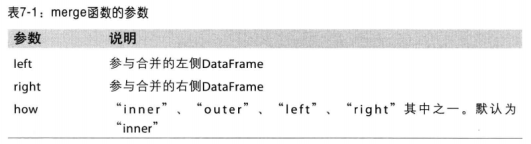

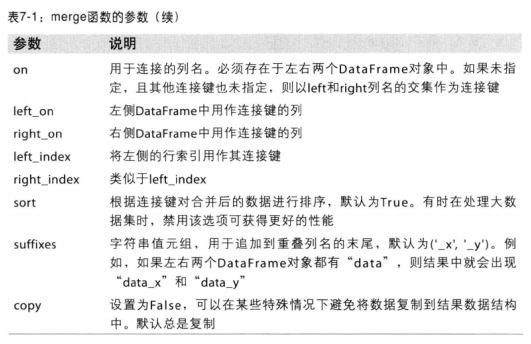

##### 索引上的合并

In [52]:
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'], 
                      'value': range(6)})
left1

key  value
0   a      0
1   b      1
2   a      2
3   a      3
4   b      4
5   c      5

In [53]:
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
right1

group_val
a        3.5
b        7.0

In [55]:
pd.merge(left1,right1,left_on='key',right_index=True)
#即左边的看key列，右边的看index索引列

key  value  group_val
0   a      0        3.5
2   a      2        3.5
3   a      3        3.5
1   b      1        7.0
4   b      4        7.0

##### 处理层级索引

In [58]:
lefth = pd.DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio',
                               'Nevada', 'Nevada'], 
                      'key2': [2000, 2001, 2002, 2001, 2002], 
                      'data': np.arange(5.)})
lefth

key1  key2  data
0    Ohio  2000   0.0
1    Ohio  2001   1.0
2    Ohio  2002   2.0
3  Nevada  2001   3.0
4  Nevada  2002   4.0

In [59]:
righth = pd.DataFrame(np.arange(12).reshape((6, 2)),
                      index=[['Nevada', 'Nevada', 'Ohio', 'Ohio', 
                              'Ohio', 'Ohio'], 
                             [2001, 2000, 2000, 2000, 2001, 2002]], 
                      columns=['event1', 'event2'])
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [60]:
pd.merge(lefth,righth,left_on=['key1','key2'],right_index=True)

key1  key2  data  event1  event2
0    Ohio  2000   0.0       4       5
0    Ohio  2000   0.0       6       7
1    Ohio  2001   1.0       8       9
2    Ohio  2002   2.0      10      11
3  Nevada  2001   3.0       0       1

##### 两个对象都用index合并

In [62]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]], 
                     index=['a', 'c', 'e'], 
                     columns=['Ohio', 'Nevada'])
left2

Ohio  Nevada
a   1.0     2.0
c   3.0     4.0
e   5.0     6.0

In [63]:
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]], 
                      index=['b', 'c', 'd', 'e'],
                      columns=['Missouri', 'Alabama'])
right2

Missouri  Alabama
b       7.0      8.0
c       9.0     10.0
d      11.0     12.0
e      13.0     14.0

In [64]:
pd.merge(left2,right2,left_index=True,right_index=True,how='outer')

Ohio  Nevada  Missouri  Alabama
a   1.0     2.0       NaN      NaN
b   NaN     NaN       7.0      8.0
c   3.0     4.0       9.0     10.0
d   NaN     NaN      11.0     12.0
e   5.0     6.0      13.0     14.0

##### join实例方法，直接用index连接

In [65]:
left2.join(right2,how='outer')

Ohio  Nevada  Missouri  Alabama
a   1.0     2.0       NaN      NaN
b   NaN     NaN       7.0      8.0
c   3.0     4.0       9.0     10.0
d   NaN     NaN      11.0     12.0
e   5.0     6.0      13.0     14.0

### 轴相连接（沿轴串联）

##### numpy对象的concatenate

In [66]:
arr=np.arange(12).reshape(3,4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [68]:
np.concatenate([arr,arr],axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

##### pandas对象的concat（默认axis=0）

In [69]:
s1=Series([0,1],index=['a','b'])
s2=Series([2,3,4],index=['c','d','e'])
s3=Series([5,6],index=['f','g'])

In [70]:
s1

a    0
b    1
dtype: int64

In [71]:
s2

c    2
d    3
e    4
dtype: int64

In [72]:
s3

f    5
g    6
dtype: int64

In [73]:
pd.concat([s1,s2,s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

##### 按列（axis=1）拼接，即第n个对象构成第n列

In [74]:
pd.concat([s1,s2,s3],axis=1)

D:\Conda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


0    1    2
a  0.0  NaN  NaN
b  1.0  NaN  NaN
c  NaN  2.0  NaN
d  NaN  3.0  NaN
e  NaN  4.0  NaN
f  NaN  NaN  5.0
g  NaN  NaN  6.0

##### join和join_axes指定显示

In [76]:
s4=pd.concat([s1*5,s3])
s4

a    0
b    5
f    5
g    6
dtype: int64

In [77]:
pd.concat([s1,s4],axis=1)

D:\Conda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


0  1
a  0.0  0
b  1.0  5
f  NaN  5
g  NaN  6

In [79]:
pd.concat([s1,s4],axis=1,join='inner')#即只显示交集

0  1
a  0  0
b  1  5

In [80]:
pd.concat([s1,s4],axis=1,join_axes=[['a','c','b','e']])

D:\Conda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  """Entry point for launching an IPython kernel.


0    1
a  0.0  0.0
c  NaN  NaN
b  1.0  5.0
e  NaN  NaN

##### 在连接轴上创建层次化索引

In [82]:
result=pd.concat([s1,s2,s3],keys=['one','two','three'])
result

one    a    0
       b    1
two    c    2
       d    3
       e    4
three  f    5
       g    6
dtype: int64

In [83]:
result.unstack()

a    b    c    d    e    f    g
one    0.0  1.0  NaN  NaN  NaN  NaN  NaN
two    NaN  NaN  2.0  3.0  4.0  NaN  NaN
three  NaN  NaN  NaN  NaN  NaN  5.0  6.0

##### 对按列（axis=1）合并的对象添加列头

In [84]:
pd.concat([s1,s2,s3],axis=1,keys=['one','two','three'])

D:\Conda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


one  two  three
a  0.0  NaN    NaN
b  1.0  NaN    NaN
c  NaN  2.0    NaN
d  NaN  3.0    NaN
e  NaN  4.0    NaN
f  NaN  NaN    5.0
g  NaN  NaN    6.0

##### 对DataFrame进行合并

In [85]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'], 
                   columns=['one', 'two'])

df1

one  two
a    0    1
b    2    3
c    4    5

In [86]:
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'], 
                   columns=['three', 'four'])
df2

three  four
a      5     6
c      7     8

In [87]:
pd.concat([df1,df2],axis=1)

D:\Conda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


one  two  three  four
a    0    1    5.0   6.0
b    2    3    NaN   NaN
c    4    5    7.0   8.0

In [88]:
pd.concat([df1,df2],axis=1,keys=['level1','level2'])

D:\Conda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

##### 通过传入字典实现层次列索引

In [89]:
pd.concat({'level1':df1,'level2':df2},axis=1)

D:\Conda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

##### 还可以为层次化索引命名

In [91]:
pd.concat({'level1':df1,'level2':df2},axis=1,names=['upper','lower'])

D:\Conda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

##### 若行索引为无关信息可忽略ignore_index=True

In [92]:
df1=DataFrame(np.random.randn(3,4),columns=list('abcd'))
df1

a         b         c         d
0  2.788412 -1.479699 -0.499111  0.329514
1  0.373317 -0.069617  0.718411  1.746476
2 -0.676917 -0.735034 -0.273832  0.512246

In [93]:
df2=DataFrame(np.random.randn(2,3),columns=list('bda'))
df2

b         d         a
0 -0.304765  0.325758  0.979946
1  0.108857 -0.113329  1.816904

In [94]:
pd.concat([df1,df2],ignore_index=True)

D:\Conda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


a         b         c         d
0  2.788412 -1.479699 -0.499111  0.329514
1  0.373317 -0.069617  0.718411  1.746476
2 -0.676917 -0.735034 -0.273832  0.512246
3  0.979946 -0.304765       NaN  0.325758
4  1.816904  0.108857       NaN -0.113329

##### concat的其他参数：
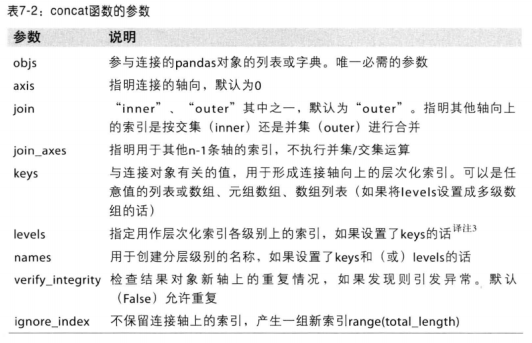

### 合并重叠数据

##### Series的combine_first方法

In [95]:
a=Series([np.nan,2.5,np.nan,3.5,4.5,np.nan],
        index=list('fedcba'))
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [97]:
b=Series(np.arange(len(a),dtype=np.float64),
         index=list('fedcba'))
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    5.0
dtype: float64

**即用a[2:]来补充b[:-2]的空缺**

In [100]:
b[:-2].combine_first(a[2:])

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

##### Dataframe同理

In [101]:
df1 = pd.DataFrame({'a': [1., np.nan, 5., np.nan], 
                    'b': [np.nan, 2., np.nan, 6.], 
                    'c': range(2, 18, 4)})
df1

a    b   c
0  1.0  NaN   2
1  NaN  2.0   6
2  5.0  NaN  10
3  NaN  6.0  14

In [102]:
df2 = pd.DataFrame({'a': [5., 4., np.nan, 3., 7.], 
                    'b': [np.nan, 3., 4., 6., 8.]})
df2

a    b
0  5.0  NaN
1  4.0  3.0
2  NaN  4.0
3  3.0  6.0
4  7.0  8.0

In [103]:
df1.combine_first(df2)

a    b     c
0  1.0  NaN   2.0
1  4.0  2.0   6.0
2  5.0  4.0  10.0
3  3.0  6.0  14.0
4  7.0  8.0   NaN

### reshape和pivot

##### srack将行索引转化为列的层次索引

In [104]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                    index=pd.Index(['Ohio', 'Colorado'], name='state'), 
                    columns=pd.Index(['one', 'two', 'three'], 
                    name='number'))
data

number    one  two  three
state                    
Ohio        0    1      2
Colorado    3    4      5

In [106]:
result=data.stack()
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

##### unstack将Series的内层层次索引转化为行索引

In [107]:
result.unstack()

number    one  two  three
state                    
Ohio        0    1      2
Colorado    3    4      5

##### 将Series的指定层次索引转化为行索引

In [109]:
result.unstack(0)#0即最外层

state   Ohio  Colorado
number                
one        0         3
two        1         4
three      2         5

In [110]:
result.unstack('state')

state   Ohio  Colorado
number                
one        0         3
two        1         4
three      2         5

##### 对DataFrame进行unstack，被unstack的列将变为最底层的行索引

In [111]:
df = pd.DataFrame({'left': result, 'right': result + 5}, 
                  columns=pd.Index(['left', 'right'], name='side'))
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [112]:
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

### 数据转换

##### 检测重复值

In [113]:
data=DataFrame({
    'k1':['one']*3+['two']*4,
    'k2':[1,1,2,3,3,4,4]
})
data

k1  k2
0  one   1
1  one   1
2  one   2
3  two   3
4  two   3
5  two   4
6  two   4

In [115]:
data.duplicated()#检查各行与前面是否重复

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

##### 删除重复值

In [117]:
data.drop_duplicates()#返回一个去除了重复的DataFrame

k1  k2
0  one   1
2  one   2
3  two   3
5  two   4

In [118]:
data

k1  k2
0  one   1
1  one   1
2  one   2
3  two   3
4  two   3
5  two   4
6  two   4

##### 指定列用于筛选重复

In [119]:
data.drop_duplicates('k1')#只看k1是不是重复

k1  k2
0  one   1
3  two   3

### 利用函数进行转换

In [120]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                              'Pastrami', 'corned beef', 'Bacon',
                              'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

food  ounces
0        bacon     4.0
1  pulled pork     3.0
2        bacon    12.0
3     Pastrami     6.0
4  corned beef     7.5
5        Bacon     8.0
6     pastrami     3.0
7    honey ham     5.0
8     nova lox     6.0

**需要增加一列animal表示food的来源**

In [121]:
meat_to_animal = {
    'bacon': 'pig',
    'pulled pork': 'pig',
    'pastrami': 'cow',
    'corned beef': 'cow',
    'honey ham': 'pig',
    'nova lox': 'salmon'
}#food到animal的映射关系

**解决原列表food的大小写问题**

In [123]:
lowercased=data['food'].str.lower()
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [125]:
data['animal']=lowercased.map(meat_to_animal)
data

food  ounces  animal
0        bacon     4.0     pig
1  pulled pork     3.0     pig
2        bacon    12.0     pig
3     Pastrami     6.0     cow
4  corned beef     7.5     cow
5        Bacon     8.0     pig
6     pastrami     3.0     cow
7    honey ham     5.0     pig
8     nova lox     6.0  salmon

**或利用匿名函数**

In [126]:
data['animal']=data['food'].map(lambda x:meat_to_animal[x.lower()])
data

food  ounces  animal
0        bacon     4.0     pig
1  pulled pork     3.0     pig
2        bacon    12.0     pig
3     Pastrami     6.0     cow
4  corned beef     7.5     cow
5        Bacon     8.0     pig
6     pastrami     3.0     cow
7    honey ham     5.0     pig
8     nova lox     6.0  salmon

### 替换值

##### 填充NaN值

In [127]:
data=Series([1,np.nan,np.nan,3,4])
data

0    1.0
1    NaN
2    NaN
3    3.0
4    4.0
dtype: float64

In [129]:
data.fillna(0)

0    1.0
1    0.0
2    0.0
3    3.0
4    4.0
dtype: float64

##### 替换指定值

In [130]:
data=Series([1.,-999.,2.,-999.,-1000.,3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [131]:
data.replace(-999.,np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

##### 替换多个值

In [132]:
data.replace([-999,-1000],np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [133]:
data.replace([-999,-1000],[np.nan,0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [134]:
data.replace({-999:np.nan,-1000:0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

### 重命名轴索引

##### 直接更改.index

In [135]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
New York    8    9     10    11

In [138]:
data.index=data.index.map(str.upper)
data

one  two  three  four
OHIO        0    1      2     3
COLORADO    4    5      6     7
NEW YORK    8    9     10    11

##### 创建原对象的更改版

In [139]:
data.rename(index=str.title,columns=str.upper)

ONE  TWO  THREE  FOUR
Ohio        0    1      2     3
Colorado    4    5      6     7
New York    8    9     10    11

##### 对部分轴标签更改

In [140]:
data.rename(index={'OHIO':'INDIANA'},
           columns={'three':'peekaboo'})

one  two  peekaboo  four
INDIANA     0    1         2     3
COLORADO    4    5         6     7
NEW YORK    8    9        10    11

### 离散化和装箱（bin）

##### 划分区间

In [141]:
ages=[20,22,25,27,21,23,37,31,61,45,41,32]
bins=[18,25,35,60,100]#区间划分默认左开右闭
cats=pd.cut(ages,bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

##### 数据集中数据的分类代码

In [143]:
cats.codes#数据集中数据的分类代码

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

##### 分类区间

In [145]:
cats.categories#分类区间

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')

##### 统计各区间频数

In [146]:
pd.value_counts(cats)#统计各区间频数

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

##### 改为右开

In [147]:
pd.cut(ages,bins,right=False)#改为右开

[[18, 25), [18, 25), [25, 35), [25, 35), [18, 25), ..., [25, 35), [60, 100), [35, 60), [35, 60), [25, 35)]
Length: 12
Categories (4, interval[int64]): [[18, 25) < [25, 35) < [35, 60) < [60, 100)]

##### 用一个list给各个分类区间命名

In [151]:
group_names=['Youth','YoungAdult','Middleaged','Senior']
#用一个list给各个分类区间命名
cats2=pd.cut(ages,bins,labels=group_names)
cats2

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, Middleaged, Middleaged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < Middleaged < Senior]

In [153]:
pd.value_counts(cats2)

Youth         5
Middleaged    3
YoungAdult    3
Senior        1
dtype: int64

##### 根据最大最小值自动获得等长bins

In [156]:
data=np.random.randn(20)
pd.cut(data,4,precision=2)#精确到后两位

[(0.32, 1.44], (-0.79, 0.32], (-0.79, 0.32], (0.32, 1.44], (-1.91, -0.79], ..., (-0.79, 0.32], (-1.91, -0.79], (0.32, 1.44], (0.32, 1.44], (0.32, 1.44]]
Length: 20
Categories (4, interval[float64]): [(-1.91, -0.79] < (-0.79, 0.32] < (0.32, 1.44] < (1.44, 2.55]]

##### qcut根据各bin数量均匀自动获得bins

**因此得到分位点**

In [157]:
data=np.random.randn(1000)
cats=pd.qcut(data,4)
cats

[(-0.708, 0.0124], (0.666, 3.739], (0.0124, 0.666], (-0.708, 0.0124], (0.666, 3.739], ..., (-3.053, -0.708], (0.666, 3.739], (0.666, 3.739], (0.666, 3.739], (0.0124, 0.666]]
Length: 1000
Categories (4, interval[float64]): [(-3.053, -0.708] < (-0.708, 0.0124] < (0.0124, 0.666] < (0.666, 3.739]]

In [159]:
pd.value_counts(cats)

(0.666, 3.739]      250
(0.0124, 0.666]     250
(-0.708, 0.0124]    250
(-3.053, -0.708]    250
dtype: int64

##### 手动指定百分比以获取相应百分位分割

In [163]:
cats2=pd.qcut(data,[0,0.1,0.5,0.9,1.])
cats2

[(-1.24, 0.0124], (0.0124, 1.296], (0.0124, 1.296], (-1.24, 0.0124], (0.0124, 1.296], ..., (-3.053, -1.24], (0.0124, 1.296], (1.296, 3.739], (0.0124, 1.296], (0.0124, 1.296]]
Length: 1000
Categories (4, interval[float64]): [(-3.053, -1.24] < (-1.24, 0.0124] < (0.0124, 1.296] < (1.296, 3.739]]

In [164]:
pd.value_counts(cats2)

(0.0124, 1.296]    400
(-1.24, 0.0124]    400
(1.296, 3.739]     100
(-3.053, -1.24]    100
dtype: int64

### 检测过滤离群值outlier

In [168]:
np.random.seed(12345)
data=DataFrame(np.random.randn(1000,4))
data.describe()

0            1            2            3
count  1000.000000  1000.000000  1000.000000  1000.000000
mean     -0.067684     0.067924     0.025598    -0.002298
std       0.998035     0.992106     1.006835     0.996794
min      -3.428254    -3.548824    -3.184377    -3.745356
25%      -0.774890    -0.591841    -0.641675    -0.644144
50%      -0.116401     0.101143     0.002073    -0.013611
75%       0.616366     0.780282     0.680391     0.654328
max       3.366626     2.653656     3.260383     3.927528

**找出某列中绝对值大于3的值**

In [169]:
col=data[3]
col[np.abs(col)>3]

97     3.927528
305   -3.399312
400   -3.745356
Name: 3, dtype: float64

**选出全部含有绝对值大于3的值的行**

In [170]:
data[(np.abs(data) > 3).any(1)] 

0         1         2         3
5   -0.539741  0.476985  3.248944 -1.021228
97  -0.774363  0.552936  0.106061  3.927528
102 -0.655054 -0.565230  3.176873  0.959533
305 -2.315555  0.457246 -0.025907 -3.399312
324  0.050188  1.951312  3.260383  0.963301
400  0.146326  0.508391 -0.196713 -3.745356
499 -0.293333 -0.242459 -3.056990  1.918403
523 -3.428254 -0.296336 -0.439938 -0.867165
586  0.275144  1.179227 -3.184377  1.369891
808 -0.362528 -3.548824  1.553205 -2.186301
900  3.366626 -2.372214  0.851010  1.332846

### 排列和随机采样

##### 对DataFrame的行随机重排

In [171]:
df = pd.DataFrame(np.arange(5 * 4).reshape((5, 4)))
df

0   1   2   3
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15
4  16  17  18  19

In [177]:
sampler=np.random.permutation(5)#产生长度为5的随机序列
sampler

array([1, 0, 4, 3, 2])

In [178]:
df.take(sampler)

0   1   2   3
1   4   5   6   7
0   0   1   2   3
4  16  17  18  19
3  12  13  14  15
2   8   9  10  11

##### 随机数选取样本

In [179]:
bag=np.array([5,7,-1,6,4])
sampler=np.random.randint(0,len(bag),size=10)
sampler

array([3, 0, 4, 1, 1, 2, 3, 0, 1, 2])

In [180]:
draws=bag.take(sampler)
draws

array([ 6,  5,  4,  7,  7, -1,  6,  5,  7, -1])

### 虚拟变量

In [181]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                   'data1': range(6)})
df

key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   b      5

In [182]:
pd.get_dummies(df['key'])

a  b  c
0  0  1  0
1  0  1  0
2  1  0  0
3  0  0  1
4  1  0  0
5  0  1  0

##### 给column加上前缀

In [184]:
dummies=pd.get_dummies(df['key'],prefix='key')
dummies

key_a  key_b  key_c
0      0      1      0
1      0      1      0
2      1      0      0
3      0      0      1
4      1      0      0
5      0      1      0

In [191]:
df_with_dummy=df[['data1']].join(dummies)
#两个方括号才是DataFrame，一个方括号是Series
df_with_dummy

data1  key_a  key_b  key_c
0      0      0      1      0
1      1      0      1      0
2      2      1      0      0
3      3      0      0      1
4      4      1      0      0
5      5      0      1      0

##### 一列多个类别的拆分

In [192]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('./datasets/movielens/movies.dat', sep='::',
                       header=None, names=mnames, engine='python')
movies[:10]

movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy
5         6                         Heat (1995)         Action|Crime|Thriller
6         7                      Sabrina (1995)                Comedy|Romance
7         8                 Tom and Huck (1995)          Adventure|Children's
8         9                 Sudden Death (1995)                        Action
9        10                    GoldenEye (1995)     Action|Adventure|Thriller

In [194]:
all_genres=[]
for x in movies.genres:
    all_genres.extend(x.split('|'))
genres=pd.unique(all_genres)
genres

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [204]:
dummies=pd.DataFrame(np.zeros((len(movies),len(genres))),columns=genres)
dummies.head()

Animation  Children's  Comedy  Adventure  Fantasy  Romance  Drama  Action  \
0        0.0         0.0     0.0        0.0      0.0      0.0    0.0     0.0   
1        0.0         0.0     0.0        0.0      0.0      0.0    0.0     0.0   
2        0.0         0.0     0.0        0.0      0.0      0.0    0.0     0.0   
3        0.0         0.0     0.0        0.0      0.0      0.0    0.0     0.0   
4        0.0         0.0     0.0        0.0      0.0      0.0    0.0     0.0   

   Crime  Thriller  Horror  Sci-Fi  Documentary  War  Musical  Mystery  \
0    0.0       0.0     0.0     0.0          0.0  0.0      0.0      0.0   
1    0.0       0.0     0.0     0.0          0.0  0.0      0.0      0.0   
2    0.0       0.0     0.0     0.0          0.0  0.0      0.0      0.0   
3    0.0       0.0     0.0     0.0          0.0  0.0      0.0      0.0   
4    0.0       0.0     0.0     0.0          0.0  0.0      0.0      0.0   

   Film-Noir  Western  
0        0.0      0.0  
1        0.0      0.0  
2        0.0      0.0  
3        0.0      0.0  
4        0.0      0.0

**处理一个作为例子**

In [205]:
gen=movies.genres[0]
gen

"Animation|Children's|Comedy"

In [207]:
dummies.columns.get_indexer(gen.split('|'))

array([0, 1, 2], dtype=int64)

**遍历每一个**

In [208]:
for i,gen in enumerate(movies.genres):
    indices=dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i,indices]=1

dummies.head()

Animation  Children's  Comedy  Adventure  Fantasy  Romance  Drama  Action  \
0        1.0         1.0     1.0        0.0      0.0      0.0    0.0     0.0   
1        0.0         1.0     0.0        1.0      1.0      0.0    0.0     0.0   
2        0.0         0.0     1.0        0.0      0.0      1.0    0.0     0.0   
3        0.0         0.0     1.0        0.0      0.0      0.0    1.0     0.0   
4        0.0         0.0     1.0        0.0      0.0      0.0    0.0     0.0   

   Crime  Thriller  Horror  Sci-Fi  Documentary  War  Musical  Mystery  \
0    0.0       0.0     0.0     0.0          0.0  0.0      0.0      0.0   
1    0.0       0.0     0.0     0.0          0.0  0.0      0.0      0.0   
2    0.0       0.0     0.0     0.0          0.0  0.0      0.0      0.0   
3    0.0       0.0     0.0     0.0          0.0  0.0      0.0      0.0   
4    0.0       0.0     0.0     0.0          0.0  0.0      0.0      0.0   

   Film-Noir  Western  
0        0.0      0.0  
1        0.0      0.0  
2        0.0      0.0  
3        0.0      0.0  
4        0.0      0.0

**最后合并**

In [210]:
movies_windic=movies.join(dummies.add_prefix('Genre_'))
movies_windic.head()

movie_id                               title                        genres  \
0         1                    Toy Story (1995)   Animation|Children's|Comedy   
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy   
2         3             Grumpier Old Men (1995)                Comedy|Romance   
3         4            Waiting to Exhale (1995)                  Comedy|Drama   
4         5  Father of the Bride Part II (1995)                        Comedy   

   Genre_Animation  Genre_Children's  Genre_Comedy  Genre_Adventure  \
0              1.0               1.0           1.0              0.0   
1              0.0               1.0           0.0              1.0   
2              0.0               0.0           1.0              0.0   
3              0.0               0.0           1.0              0.0   
4              0.0               0.0           1.0              0.0   

   Genre_Fantasy  Genre_Romance  Genre_Drama  ...  Genre_Crime  \
0            0.0            0.0          0.0  ...          0.0   
1            1.0            0.0          0.0  ...          0.0   
2            0.0            1.0          0.0  ...          0.0   
3            0.0            0.0          1.0  ...          0.0   
4            0.0            0.0          0.0  ...          0.0   

   Genre_Thriller  Genre_Horror  Genre_Sci-Fi  Genre_Documentary  Genre_War  \
0             0.0           0.0           0.0                0.0        0.0   
1             0.0           0.0           0.0                0.0        0.0   
2             0.0           0.0           0.0                0.0        0.0   
3             0.0           0.0           0.0                0.0        0.0   
4             0.0           0.0           0.0                0.0        0.0   

   Genre_Musical  Genre_Mystery  Genre_Film-Noir  Genre_Western  
0            0.0            0.0              0.0            0.0  
1            0.0            0.0              0.0            0.0  
2            0.0            0.0              0.0            0.0  
3            0.0            0.0              0.0            0.0  
4            0.0            0.0              0.0            0.0  

[5 rows x 21 columns]

##### 统计样本落在离散区间的频数

In [211]:
values=np.random.rand(10)
values

array([0.48344916, 0.11734259, 0.07557764, 0.21863608, 0.90953758,
       0.38441329, 0.08127486, 0.95663486, 0.04387138, 0.14476865])

In [212]:
bins=[0,0.2,0.4,0.6,0.8,1.]
pd.get_dummies(pd.cut(values,bins))

(0.0, 0.2]  (0.2, 0.4]  (0.4, 0.6]  (0.6, 0.8]  (0.8, 1.0]
0           0           0           1           0           0
1           1           0           0           0           0
2           1           0           0           0           0
3           0           1           0           0           0
4           0           0           0           0           1
5           0           1           0           0           0
6           1           0           0           0           0
7           0           0           0           0           1
8           1           0           0           0           0
9           1           0           0           0           0

### 字符串处理

##### 抽取逗号分隔项

In [213]:
val='a,b , guido'
val.split(',')

['a', 'b ', ' guido']

##### 去除空格和换行符

In [215]:
pieces=[x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

##### 分隔字符串

In [216]:
'::'.join(pieces)

'a::b::guido'

##### 检测子字符串

In [217]:
val

'a,b , guido'

In [218]:
'guido' in val

True

In [221]:
val.index('b')

2

In [222]:
val.find('b')

2

In [223]:
val.find(':')#不存在返回-1

-1

##### 查询子串出现次数

In [224]:
val.count(',')

2

##### 其他字符串方法：
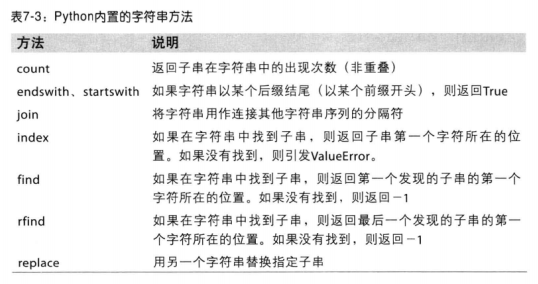

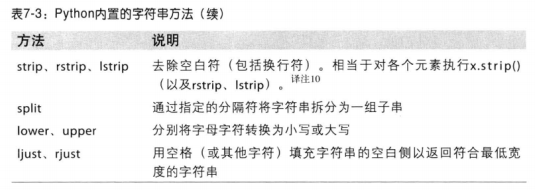

### 正则

##### 分隔并去除空白

In [225]:
import re
text='foo    bar   \t baz  \t qux'
re.split('\s+',text)#\s表示空白符

['foo', 'bar', 'baz', 'qux']

##### 另一种方法

In [226]:
regex=re.compile('\s+')
regex.split(text)

['foo', 'bar', 'baz', 'qux']

##### 将匹配对象分段

In [233]:
pattern=r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
regex=re.compile(pattern,flags=re.IGNORECASE)#不区分大小写匹配
m=regex.match('wesm@bright.nett')
m.groups()

('wesm', 'bright', 'nett')

##### 查找所有匹配子串

In [234]:
text = """Dave dave@google.com 
          Steve steve@gmail.com 
          Rob rob@gmail.com 
          Ryan ryan@yahoo.com """

In [235]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

##### 将匹配的子串替换为指定字符串

In [236]:
print(regex.sub('REDACTED', text))

Dave REDACTED 
          Steve REDACTED 
          Rob REDACTED 
          Ryan REDACTED 


##### 格式化替换

In [237]:
print(regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text))

Dave Username: dave, Domain: google, Suffix: com 
          Steve Username: steve, Domain: gmail, Suffix: com 
          Rob Username: rob, Domain: gmail, Suffix: com 
          Ryan Username: ryan, Domain: yahoo, Suffix: com 


##### 给匹配分组加上名称

In [241]:
regex=re.compile(r"""
(?P<username>[A-Z0-9._%+-]+)
@
(?P<domain>[A-Z0-0.-]+)
\.
(?P<suffix>[A-Z]{2,4})""",flags=re.IGNORECASE|re.VERBOSE)

In [242]:
m=regex.match('wesm@bright.net')
m.groupdict()

{'username': 'wesm', 'domain': 'bright', 'suffix': 'net'}

### pandas中矢量化的字符串函数

##### 检查每个元素作为字符串是否含有某子串

In [244]:
data={
    'Dave':'dave@google.com',
    'Steve':'steve@gmail.com',
    'Rob':'rob@gmali.com',
    'Wes':np.nan
}
data=Series(data)
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmali.com
Wes                  NaN
dtype: object

In [245]:
data.isnull()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

In [246]:
data.str

In [247]:
data.str.contains('gmail')

Dave     False
Steve     True
Rob      False
Wes        NaN
dtype: object

##### 使用正则表达式逐个匹配

In [248]:
pattern

'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [249]:
data.str.findall(pattern,flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmali, com)]
Wes                        NaN
dtype: object

### 实例：USDA食品数据库

#### 准备工作

In [267]:
import pandas as pd
import numpy as np
import json
pd.options.display.max_rows=10

#### 打开并读入文件

In [269]:
with open('./datasets/usda_food/database.json') as f:
    db=json.load(f)
len(db)

6636

#### 检查文件的结构

In [270]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [273]:
db[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [274]:
nutrients=pd.DataFrame(db[0]['nutrients'])
nutrients

value units                         description        group
0     25.180     g                             Protein  Composition
1     29.200     g                   Total lipid (fat)  Composition
2      3.060     g         Carbohydrate, by difference  Composition
3      3.280     g                                 Ash        Other
4    376.000  kcal                              Energy       Energy
..       ...   ...                                 ...          ...
157    1.472     g                              Serine  Amino Acids
158   93.000    mg                         Cholesterol        Other
159   18.584     g        Fatty acids, total saturated        Other
160    8.275     g  Fatty acids, total monounsaturated        Other
161    0.830     g  Fatty acids, total polyunsaturated        Other

[162 rows x 4 columns]

#### 抽取部分需要的信息

In [290]:
info_keys=['description','group','id','manufacturer']
info=pd.DataFrame(db,columns=info_keys)
info

description  \
0                                       Cheese, caraway   
1                                       Cheese, cheddar   
2                                          Cheese, edam   
3                                          Cheese, feta   
4                    Cheese, mozzarella, part skim milk   
...                                                 ...   
6631                             Bologna, beef, low fat   
6632  Turkey and pork sausage, fresh, bulk, patty or...   
6633                              Babyfood, juice, pear   
6634         Babyfood, dessert, banana yogurt, strained   
6635              Babyfood, banana no tapioca, strained   

                            group     id manufacturer  
0          Dairy and Egg Products   1008               
1          Dairy and Egg Products   1009               
2          Dairy and Egg Products   1018               
3          Dairy and Egg Products   1019               
4          Dairy and Egg Products   1028               
...                           ...    ...          ...  
6631  Sausages and Luncheon Meats  42161               
6632  Sausages and Luncheon Meats  42173               
6633                   Baby Foods  43408         None  
6634                   Baby Foods  43539         None  
6635                   Baby Foods  43546         None  

[6636 rows x 4 columns]

In [291]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
description     6636 non-null object
group           6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


#### 统计食物类别group的分布

In [292]:
pd.value_counts(info.group)

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
                                    ... 
Dairy and Egg Products               107
Fats and Oils                         97
Meals, Entrees, and Sidedishes        57
Restaurant Foods                      51
Spices and Herbs                      41
Name: group, Length: 25, dtype: int64

#### 提取每个食物nutrients分类的内容

In [278]:
nutrients_all=pd.DataFrame()

for food in db:
    nutrients=pd.DataFrame(food['nutrients'])
    nutrients['id']=food['id']
    nutrients_all=nutrients_all.append(nutrients,ignore_index=True)

In [279]:
nutrients_all

value units                         description        group     id
0        25.180     g                             Protein  Composition   1008
1        29.200     g                   Total lipid (fat)  Composition   1008
2         3.060     g         Carbohydrate, by difference  Composition   1008
3         3.280     g                                 Ash        Other   1008
4       376.000  kcal                              Energy       Energy   1008
...         ...   ...                                 ...          ...    ...
389350    0.000   mcg                 Vitamin B-12, added     Vitamins  43546
389351    0.000    mg                         Cholesterol        Other  43546
389352    0.072     g        Fatty acids, total saturated        Other  43546
389353    0.028     g  Fatty acids, total monounsaturated        Other  43546
389354    0.041     g  Fatty acids, total polyunsaturated        Other  43546

[389355 rows x 5 columns]

#### 检查重复的行并去除

In [280]:
nutrients_all.duplicated().sum()

14179

In [281]:
nutrients_all=nutrients_all.drop_duplicates()
nutrients_all

value units                         description        group     id
0        25.180     g                             Protein  Composition   1008
1        29.200     g                   Total lipid (fat)  Composition   1008
2         3.060     g         Carbohydrate, by difference  Composition   1008
3         3.280     g                                 Ash        Other   1008
4       376.000  kcal                              Energy       Energy   1008
...         ...   ...                                 ...          ...    ...
389350    0.000   mcg                 Vitamin B-12, added     Vitamins  43546
389351    0.000    mg                         Cholesterol        Other  43546
389352    0.072     g        Fatty acids, total saturated        Other  43546
389353    0.028     g  Fatty acids, total monounsaturated        Other  43546
389354    0.041     g  Fatty acids, total polyunsaturated        Other  43546

[375176 rows x 5 columns]

#### 避免与原表标签同名，更改列名

In [343]:
col_mapping={
    'description':'food',
    'group':'fgroup'
}
info=info.rename(columns=col_mapping,copy=False)
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
food            6636 non-null object
fgroup          6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [344]:
info

food  \
0                                       Cheese, caraway   
1                                       Cheese, cheddar   
2                                          Cheese, edam   
3                                          Cheese, feta   
4                    Cheese, mozzarella, part skim milk   
...                                                 ...   
6631                             Bologna, beef, low fat   
6632  Turkey and pork sausage, fresh, bulk, patty or...   
6633                              Babyfood, juice, pear   
6634         Babyfood, dessert, banana yogurt, strained   
6635              Babyfood, banana no tapioca, strained   

                           fgroup     id manufacturer  
0          Dairy and Egg Products   1008               
1          Dairy and Egg Products   1009               
2          Dairy and Egg Products   1018               
3          Dairy and Egg Products   1019               
4          Dairy and Egg Products   1028               
...                           ...    ...          ...  
6631  Sausages and Luncheon Meats  42161               
6632  Sausages and Luncheon Meats  42173               
6633                   Baby Foods  43408         None  
6634                   Baby Foods  43539         None  
6635                   Baby Foods  43546         None  

[6636 rows x 4 columns]

In [345]:
col_mapping={
    'description':'nutrient',
    'group':'nutgroop'
}
nutrients_all=nutrients_all.rename(columns=col_mapping,copy=False)
nutrients_all

value units                            nutrient     nutgroop     id
0        25.180     g                             Protein  Composition   1008
1        29.200     g                   Total lipid (fat)  Composition   1008
2         3.060     g         Carbohydrate, by difference  Composition   1008
3         3.280     g                                 Ash        Other   1008
4       376.000  kcal                              Energy       Energy   1008
...         ...   ...                                 ...          ...    ...
389350    0.000   mcg                 Vitamin B-12, added     Vitamins  43546
389351    0.000    mg                         Cholesterol        Other  43546
389352    0.072     g        Fatty acids, total saturated        Other  43546
389353    0.028     g  Fatty acids, total monounsaturated        Other  43546
389354    0.041     g  Fatty acids, total polyunsaturated        Other  43546

[375176 rows x 5 columns]

#### 将info和nutrients_all合并

In [346]:
ndata=pd.merge(nutrients_all,info,on='id',how='outer')
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
value           375176 non-null float64
units           375176 non-null object
nutrient        375176 non-null object
nutgroop        375176 non-null object
id              375176 non-null int64
food            375176 non-null object
fgroup          375176 non-null object
manufacturer    293054 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [347]:
ndata

value units                            nutrient     nutgroop     id  \
0        25.180     g                             Protein  Composition   1008   
1        29.200     g                   Total lipid (fat)  Composition   1008   
2         3.060     g         Carbohydrate, by difference  Composition   1008   
3         3.280     g                                 Ash        Other   1008   
4       376.000  kcal                              Energy       Energy   1008   
...         ...   ...                                 ...          ...    ...   
375171    0.000   mcg                 Vitamin B-12, added     Vitamins  43546   
375172    0.000    mg                         Cholesterol        Other  43546   
375173    0.072     g        Fatty acids, total saturated        Other  43546   
375174    0.028     g  Fatty acids, total monounsaturated        Other  43546   
375175    0.041     g  Fatty acids, total polyunsaturated        Other  43546   

                                         food                  fgroup  \
0                             Cheese, caraway  Dairy and Egg Products   
1                             Cheese, caraway  Dairy and Egg Products   
2                             Cheese, caraway  Dairy and Egg Products   
3                             Cheese, caraway  Dairy and Egg Products   
4                             Cheese, caraway  Dairy and Egg Products   
...                                       ...                     ...   
375171  Babyfood, banana no tapioca, strained              Baby Foods   
375172  Babyfood, banana no tapioca, strained              Baby Foods   
375173  Babyfood, banana no tapioca, strained              Baby Foods   
375174  Babyfood, banana no tapioca, strained              Baby Foods   
375175  Babyfood, banana no tapioca, strained              Baby Foods   

       manufacturer  
0                    
1                    
2                    
3                    
4                    
...             ...  
375171         None  
375172         None  
375173         None  
375174         None  
375175         None  

[375176 rows x 8 columns]

#### 设置直观的层次索引

In [348]:
ndata.set_index(['id','nutrient'],drop=True)#drop=False保留原本的索引,True则去除原本的索引

value units     nutgroop  \
id    nutrient                                                         
1008  Protein                              25.180     g  Composition   
      Total lipid (fat)                    29.200     g  Composition   
      Carbohydrate, by difference           3.060     g  Composition   
      Ash                                   3.280     g        Other   
      Energy                              376.000  kcal       Energy   
...                                           ...   ...          ...   
43546 Vitamin B-12, added                   0.000   mcg     Vitamins   
      Cholesterol                           0.000    mg        Other   
      Fatty acids, total saturated          0.072     g        Other   
      Fatty acids, total monounsaturated    0.028     g        Other   
      Fatty acids, total polyunsaturated    0.041     g        Other   

                                                                           food  \
id    nutrient                                                                    
1008  Protein                                                   Cheese, caraway   
      Total lipid (fat)                                         Cheese, caraway   
      Carbohydrate, by difference                               Cheese, caraway   
      Ash                                                       Cheese, caraway   
      Energy                                                    Cheese, caraway   
...                                                                         ...   
43546 Vitamin B-12, added                 Babyfood, banana no tapioca, strained   
      Cholesterol                         Babyfood, banana no tapioca, strained   
      Fatty acids, total saturated        Babyfood, banana no tapioca, strained   
      Fatty acids, total monounsaturated  Babyfood, banana no tapioca, strained   
      Fatty acids, total polyunsaturated  Babyfood, banana no tapioca, strained   

                                                          fgroup manufacturer  
id    nutrient                                                                 
1008  Protein                             Dairy and Egg Products               
      Total lipid (fat)                   Dairy and Egg Products               
      Carbohydrate, by difference         Dairy and Egg Products               
      Ash                                 Dairy and Egg Products               
      Energy                              Dairy and Egg Products               
...                                                          ...          ...  
43546 Vitamin B-12, added                             Baby Foods         None  
      Cholesterol                                     Baby Foods         None  
      Fatty acids, total saturated                    Baby Foods         None  
      Fatty acids, total monounsaturated              Baby Foods         None  
      Fatty acids, total polyunsaturated              Baby Foods         None  

[375176 rows x 6 columns]

#### 对food group和nutrient type分组后，对锌含量中位数进行绘图

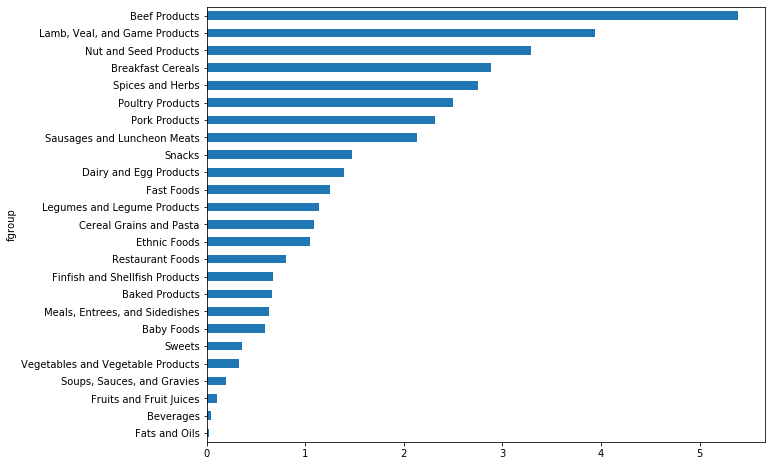

In [349]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
%matplotlib inline
result['Zinc, Zn'].sort_values().plot(kind='barh', figsize=(10, 8))

#### 找到每种营养成分含量最多的食物

In [353]:
by_nutrient=ndata.groupby(['nutgroop','nutrient'])

get_max=lambda x: x.loc[x.value.idxmax()]
get_min=lambda x: x.loc[x.value.inxmin()]

max_foods=by_nutrient.apply(get_max)[['value','food']]
max_foods.food.str[:]

nutgroop     nutrient                    
Amino Acids  Alanine                                         Gelatins, dry powder, unsweetened
             Arginine                                             Seeds, sesame flour, low-fat
             Aspartic acid                                                 Soy protein isolate
             Cystine                              Seeds, cottonseed flour, low fat (glandless)
             Glutamic acid                                                 Soy protein isolate
                                                                   ...                        
Vitamins     Vitamin D2 (ergocalciferol)                               Mushrooms, maitake, raw
             Vitamin D3 (cholecalciferol)                        Fish, halibut, Greenland, raw
             Vitamin E (alpha-tocopherol)                                      Oil, wheat germ
             Vitamin E, added                Cereals ready-to-eat, GENERAL MILLS, Multi-Gra...
        

In [354]:
max_foods.loc['Amino Acids']['food']

nutrient
Alanine                          Gelatins, dry powder, unsweetened
Arginine                              Seeds, sesame flour, low-fat
Aspartic acid                                  Soy protein isolate
Cystine               Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                  Soy protein isolate
                                       ...                        
Serine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Threonine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Tryptophan        Sea lion, Steller, meat with fat (Alaska Native)
Tyrosine         Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Valine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Name: food, Length: 19, dtype: object

## 绘图和可视化

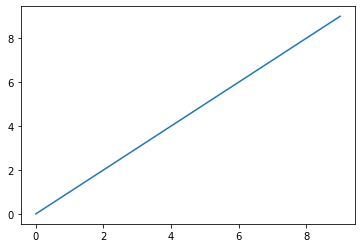

In [359]:
import matplotlib.pyplot as plt
plt.plot(np.arange(10))

### figure和subplot

##### 创建新figure

In [360]:
fig=plt.figure()

<Figure size 432x288 with 0 Axes>

##### add_subplot()创建一个或多个subplot

**绘图会在最后一个figure的最后一个subplot上进行**

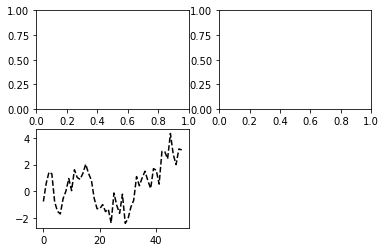

In [381]:
fig=plt.figure()
ax1=fig.add_subplot(2,2,1)#参数的意思是2x2共4幅图，其中的第一幅
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
plt.plot(np.random.randn(50).cumsum(),'k--')#k--即绘制黑色虚线图

##### 指定子图上进行绘图

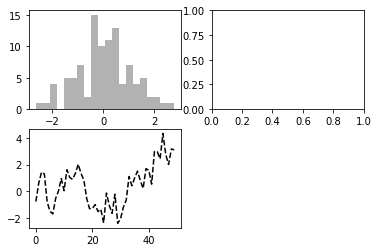

In [382]:
_=ax1.hist(np.random.randn(100),bins=20,color='k',alpha=0.3)
#hist即柱状图，bins为分箱，alpha透明度
fig

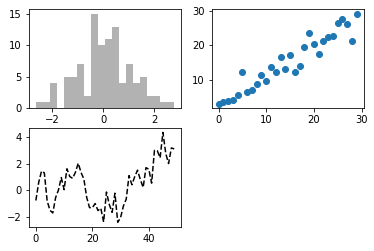

In [383]:
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))
#scatter为散点图
fig

##### 更方便：创建新的figure并返回含有已创建的subplot对象的np数组

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019189EF9788>,
      dtype=object)

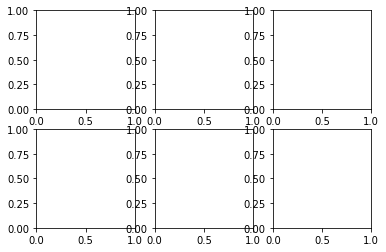

In [384]:
fig,axes=plt.subplots(2,3)
axes

**可以对axes数组进行索引如axes[0,1]，还可以通过sharex和sharey指定subplot应该具有相同的x轴或y轴**

##### pyplot.subplots()的选项：

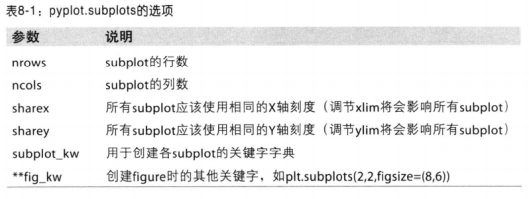

##### 调整subplot周围的间距

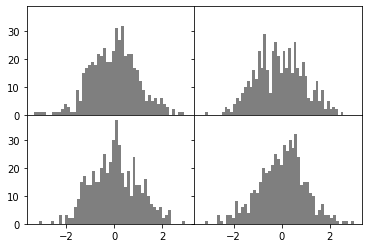

In [389]:
fig,axes=plt.subplots(2,2,sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins=50,color='k',alpha=0.5)
plt.subplots_adjust(wspace=0,hspace=0)

In [ ]:
subplots_adjust(
    left=None,bottom=None,right=None,top=None,wspace=None,hspace=None
)

**wspace和hspace用于控制宽度和高度的百分比，即可控制子图间距**

##### 颜色、标记、线型

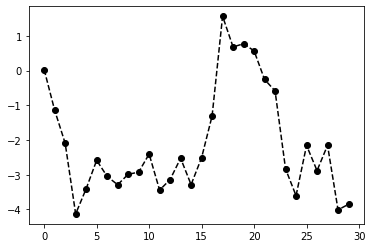

In [390]:
plt.plot(np.random.randn(30).cumsum(),'ko--')

**更详细地写出参数**

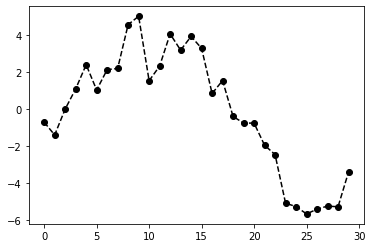

In [391]:
plt.plot(np.random.randn(30).cumsum(),color='k',linestyle='--',marker='o')

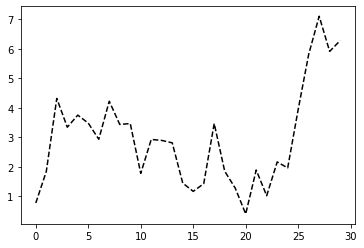

In [395]:
data=np.random.randn(30).cumsum()
plt.plot(data,'k--',label='Default')

##### 更改drawstyle为steps-post即阶梯图（默认Default为线性插值）

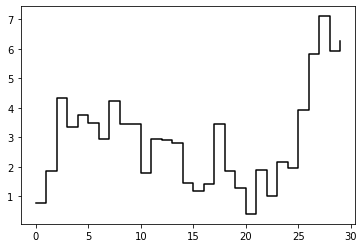

In [396]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

### 刻度、标签、图例

pyplot界面是为交互式使用而设计的，它包含很多方法，比如xlim, xticks, xticklabels。这些方法控制绘图的范围，标记位置，标记标签。有两种使用方法：

- 调用的时候不传入参数，使用当前的参数设置（例如，plt.xlim()返回当前X轴的范围）
- 调用的时候传入参数，使用传入的参数设置（例如，plt.xlim([0, 10]), 令X轴的范围从0到10）

所有这些方法，作用于激活的或最新创建的AxesSubplot对象上。每一个都在subplot有对应的两个方法；比如对于xlim，就有对应的ax.get_xlim和ax.set_xlim。这里作者使用subplot的方法，这样会更清晰。


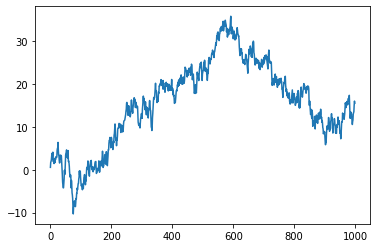

In [403]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

##### set_xticks设定标记在x轴的位置

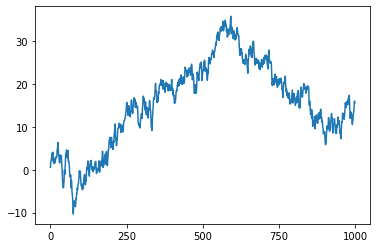

In [405]:
ticks=ax.set_xticks([0,250,500,750,1000])
fig

##### set_xticklabels设置任意值作为x轴的标签

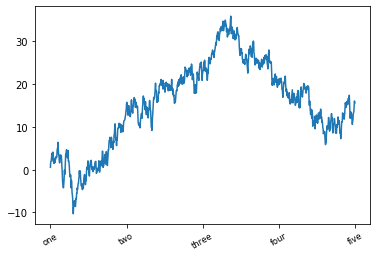

In [407]:
labels=ax.set_xticklabels(['one','two','three','four','five'],
                         rotation=30,fontsize='small')
fig

##### set_title给subplot命名标题

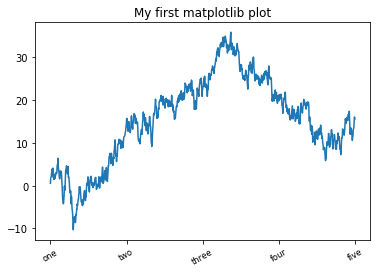

In [408]:
ax.set_title('My first matplotlib plot')
fig

##### set_xlabel为x轴设定标题

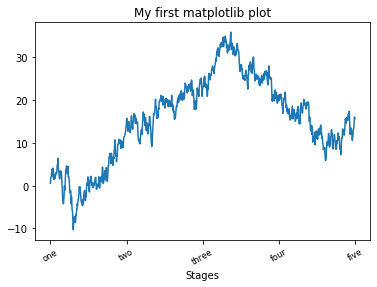

In [409]:
ax.set_xlabel('Stages')
fig

##### set方法一次设置多项

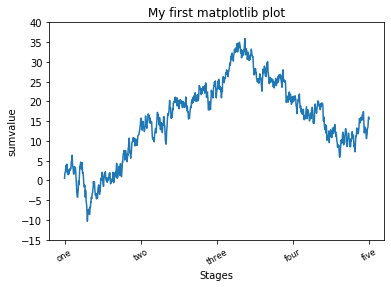

In [415]:
props={
    'ylabel':'sumvalue',
    'ylim':[-15,40],
    'yticks':[-15,-10,-5,0,5,10,15,20,25,30,35,40]
}
ax.set(**props)
fig

##### 添加图例

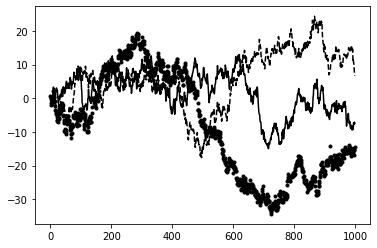

In [418]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum(),'k',label='one')
ax.plot(np.random.randn(1000).cumsum(),'k--',label='two')
ax.plot(np.random.randn(1000).cumsum(),'k.',label='three')

In [419]:
ax.legend(loc='best')#loc指定图例生成位置，'best'自动选择
#参考ax.legend?

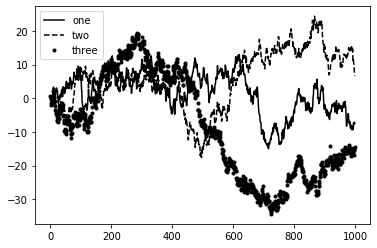

In [420]:
fig

### 注释（文本、箭头、其他形状）

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

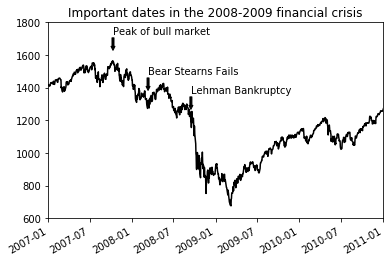

In [432]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('./examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date)+75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, 
                                width=2, headlength=4),
                horizontalalignment='left', verticalalignment='top')
    
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')

##### 图中添加图形

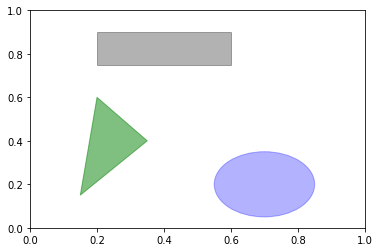

In [433]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 保存为文件

##### svg文件

In [ ]:
plt.savefig('figpath.svg')

##### png文件

In [ ]:
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

##### 其他：
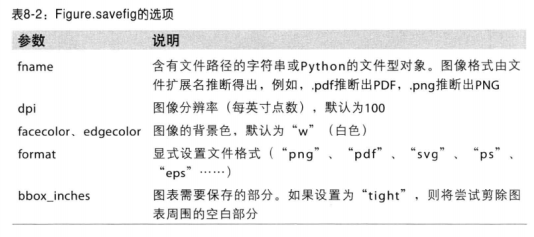

## pandas绘图

### 线图

##### Series画图

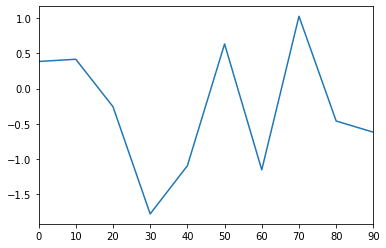

In [434]:
s=Series(np.random.randn(10).cumsum(),index=np.arange(0,100,10))
s.plot()

##### Series.plot()参数：
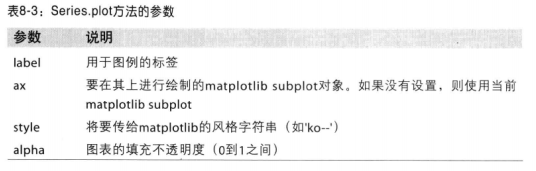

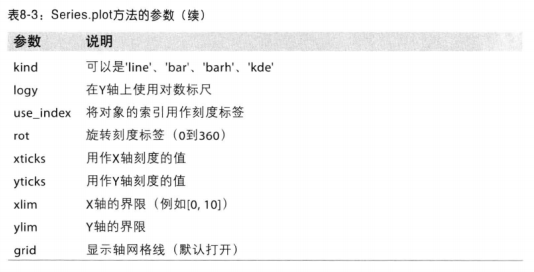

##### DataFrame画图，plot方法会在一个subplot内为每一列绘制一条线

In [435]:
df=DataFrame(np.random.randn(10,4).cumsum(0),
            columns=list('ABCD'),
            index=np.arange(0,100,10))
df

A         B         C         D
0   2.302582 -0.573264 -0.959595 -1.535340
10  2.069821 -0.188330 -0.582273 -2.117656
20  1.728882  0.234280  0.086407 -2.292337
30  1.917637  1.308988 -1.039037 -1.842262
40  0.862498  1.404964 -0.431216 -0.155641
50  3.140351  0.567339 -0.166242  0.046293
60  2.232889  0.669877 -1.172953  0.823692
70  1.019831  0.749854 -1.413005 -0.013754
80  1.264303  0.791606 -2.670240 -0.280868
90  2.504011 -0.334757 -3.339337 -1.416353

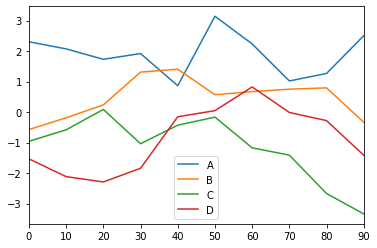

In [437]:
df.plot()

##### DataFrame.plot方法参数：
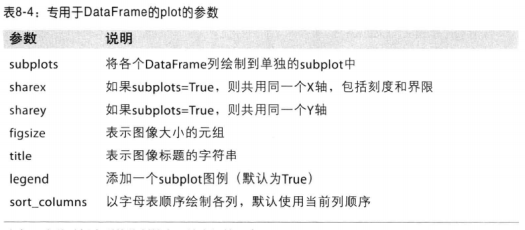

### 柱状图

##### Series绘图：传入参数kind,bar为柱状图，barh为水平柱状图

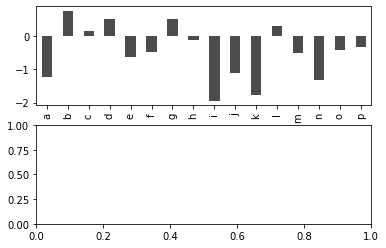

In [438]:
fig,axes=plt.subplots(2,1)
data=Series(np.random.randn(16),index=list('abcdefghijklmnop'))
data.plot(kind='bar',ax=axes[0],color='k',alpha=0.7)

In [439]:
data.plot(kind='barh',ax=axes[1],color='k',alpha=0.7)

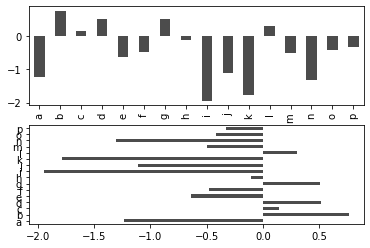

In [440]:
fig

##### DataFrame绘图：柱状图将每一行的值分为一组

In [441]:
df=DataFrame(np.random.randn(6,4),
            index=['one','two','three','four','five','six'],
            columns=pd.Index(['A','B','C','D'],name="Genus"))
df

Genus         A         B         C         D
one   -0.907081  1.092342 -0.272820  0.104343
two    0.958081 -0.877790 -0.399729  0.292664
three  0.894641 -0.805521 -0.230070  1.814592
four  -0.943954  0.474811  1.350239  0.406802
five  -0.077527  0.430037  0.275267 -0.950678
six    0.369407 -0.056473 -0.423500  0.248670

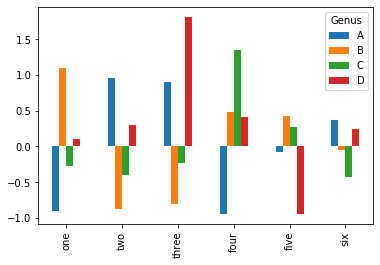

In [442]:
df.plot(kind='bar')

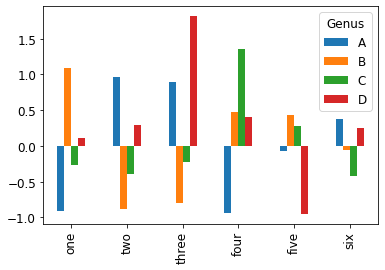

In [490]:
plt.rcParams.update({'font.size': 12})
df.plot.bar()

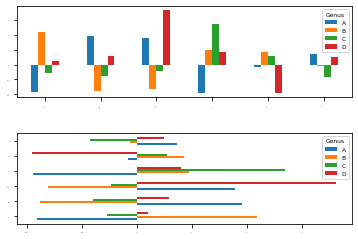

In [487]:
fig,axes=plt.subplots(2,1)
plt.subplots_adjust(wspace =0, hspace =0.4)#调整子图间距
plt.rcParams.update({'font.size': 6})#调整图例大小
df.plot(kind='bar',ax=axes[0])
df.plot(kind='barh',ax=axes[1])
plt.savefig('./barbarh.png',dpi=200)

##### 堆积柱状图

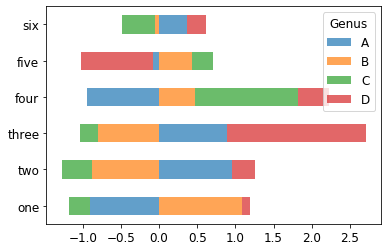

In [491]:
df.plot.barh(stacked=True,alpha=0.7)

##### 导入seaborn美化

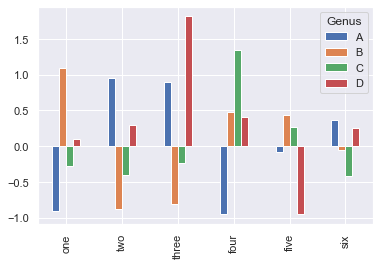

In [500]:
import seaborn as sns
sns.set()
df.plot.bar()

##### 实例：tipping(小费)数据集，假设我们想做一个堆叠的条形图，来表示在每一天，每一个大小不同的组（party）中，数据点的百分比。用read_csv导入数据，并按天数（day）和组大小（party size）做一个交叉报表（cross-tabulation）

In [502]:
tips=pd.read_csv('./examples/tips.csv')
tips.head()

total_bill   tip smoker  day    time  size
0       16.99  1.01     No  Sun  Dinner     2
1       10.34  1.66     No  Sun  Dinner     3
2       21.01  3.50     No  Sun  Dinner     3
3       23.68  3.31     No  Sun  Dinner     2
4       24.59  3.61     No  Sun  Dinner     4

In [503]:
party_counts=pd.crosstab(tips['day'],tips['size'])
#显示交叉项的频数
party_counts

size  1   2   3   4  5  6
day                      
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1
Thur  1  48   4   5  1  3

In [505]:
party_counts=party_counts.loc[:,2:5]#抽取2到5人的数据
party_counts

size   2   3   4  5
day                
Fri   16   1   1  0
Sat   53  18  13  1
Sun   39  15  18  3
Thur  48   4   5  1

In [506]:
party_pcts=party_counts.div(party_counts.sum(1),axis=0)#标准化行和为1
party_pcts

size         2         3         4         5
day                                         
Fri   0.888889  0.055556  0.055556  0.000000
Sat   0.623529  0.211765  0.152941  0.011765
Sun   0.520000  0.200000  0.240000  0.040000
Thur  0.827586  0.068966  0.086207  0.017241

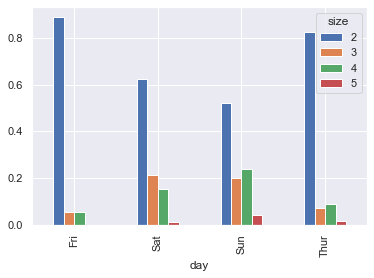

In [507]:
party_pcts.plot.bar()

##### 用seaborn处理小费百分比tipping percentage

In [509]:
import seaborn as sns 

tips['tip_pct']=tips['tip']/(tips['total_bill']-tips['tip'])
tips.head()

total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.063204
1       10.34  1.66     No  Sun  Dinner     3  0.191244
2       21.01  3.50     No  Sun  Dinner     3  0.199886
3       23.68  3.31     No  Sun  Dinner     2  0.162494
4       24.59  3.61     No  Sun  Dinner     4  0.172069

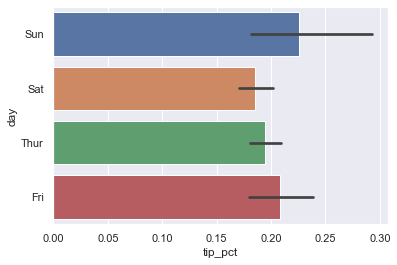

In [510]:
sns.barplot(x='tip_pct',y='day',data=tips,orient='h')

seaborn的绘图函数中有一个data参数，这里可以导入pandas的DataFrame。其他参数指的是列名。因为每一天（比如一个固定的周六）可能会有多个不同的值，所以条形图表示的是tip_pct的平均值。条形图上的黑线表示95%的置信区间（confidence interval）（这个可以通过可选参数进行更改）。

### 柱状图和密度图

##### 绘制柱状图表示tip占total_bill的比例

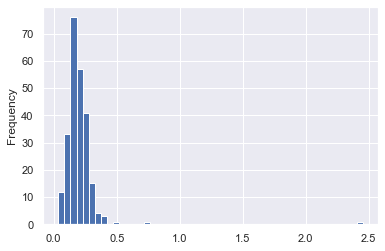

In [515]:
tips['tip_pct'].plot.hist(bins=50)

##### 绘制密度表示tip占total_bill的比例（用来计算观测数据中，连续概率分布的推测值）

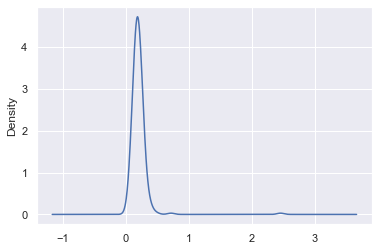

In [512]:
tips['tip_pct'].plot.density()

##### 同时绘制柱状图和密度图

In [520]:
comp1=np.random.normal(0,1,size=200)
comp2=np.random.normal(10,2,size=200)
values=pd.Series(np.concatenate([comp1,comp2]))
values

0       0.180202
1      -0.169930
2      -1.160116
3      -0.376771
4      -0.847814
         ...    
395     9.596952
396    10.332528
397     9.866226
398     9.565417
399     9.620382
Length: 400, dtype: float64

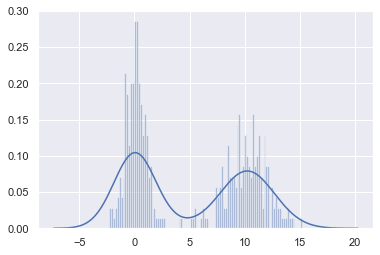

In [522]:
sns.distplot(values,bins=100,color='b')

### 散点图

##### 处理数据集的对数差分

In [523]:
macro = pd.read_csv('./examples/macrodata.csv')
macro.head()

year  quarter   realgdp  realcons  realinv  realgovt  realdpi    cpi  \
0  1959.0      1.0  2710.349    1707.4  286.898   470.045   1886.9  28.98   
1  1959.0      2.0  2778.801    1733.7  310.859   481.301   1919.7  29.15   
2  1959.0      3.0  2775.488    1751.8  289.226   491.260   1916.4  29.35   
3  1959.0      4.0  2785.204    1753.7  299.356   484.052   1931.3  29.37   
4  1960.0      1.0  2847.699    1770.5  331.722   462.199   1955.5  29.54   

      m1  tbilrate  unemp      pop  infl  realint  
0  139.7      2.82    5.8  177.146  0.00     0.00  
1  141.7      3.08    5.1  177.830  2.34     0.74  
2  140.5      3.82    5.3  178.657  2.74     1.09  
3  140.0      4.33    5.6  179.386  0.27     4.06  
4  139.6      3.50    5.2  180.007  2.31     1.19

In [524]:
data=macro[['cpi','m1','tbilrate','unemp']]
data

cpi      m1  tbilrate  unemp
0     28.980   139.7      2.82    5.8
1     29.150   141.7      3.08    5.1
2     29.350   140.5      3.82    5.3
3     29.370   140.0      4.33    5.6
4     29.540   139.6      3.50    5.2
..       ...     ...       ...    ...
198  216.889  1474.7      1.17    6.0
199  212.174  1576.5      0.12    6.9
200  212.671  1592.8      0.22    8.1
201  214.469  1653.6      0.18    9.2
202  216.385  1673.9      0.12    9.6

[203 rows x 4 columns]

In [525]:
trans_data=np.log(data).diff().dropna()
trans_data

cpi        m1  tbilrate     unemp
1    0.005849  0.014215  0.088193 -0.128617
2    0.006838 -0.008505  0.215321  0.038466
3    0.000681 -0.003565  0.125317  0.055060
4    0.005772 -0.002861 -0.212805 -0.074108
5    0.000338  0.004289 -0.266946  0.000000
..        ...       ...       ...       ...
198 -0.007904  0.045361 -0.396881  0.105361
199 -0.021979  0.066753 -2.277267  0.139762
200  0.002340  0.010286  0.606136  0.160343
201  0.008419  0.037461 -0.200671  0.127339
202  0.008894  0.012202 -0.405465  0.042560

[202 rows x 4 columns]

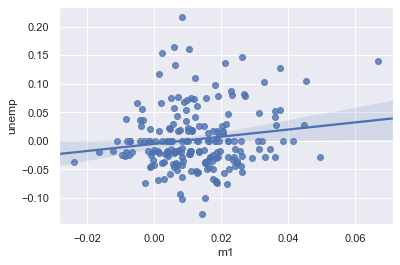

In [526]:
sns.regplot('m1','unemp',data=trans_data)

##### seaborn绘制散点图矩阵

在数据探索阶段，散点图能把一组变量之间所有的散点图都画出来，这种图被称之为pairs plot（多变量图）或scatter plot matrix（散点图矩阵）。画这样的图很麻烦，所以seaborn有一个非常方便的pairplot函数，这个函数可以把每一个参数的柱状图或密度估计画在对角线上：

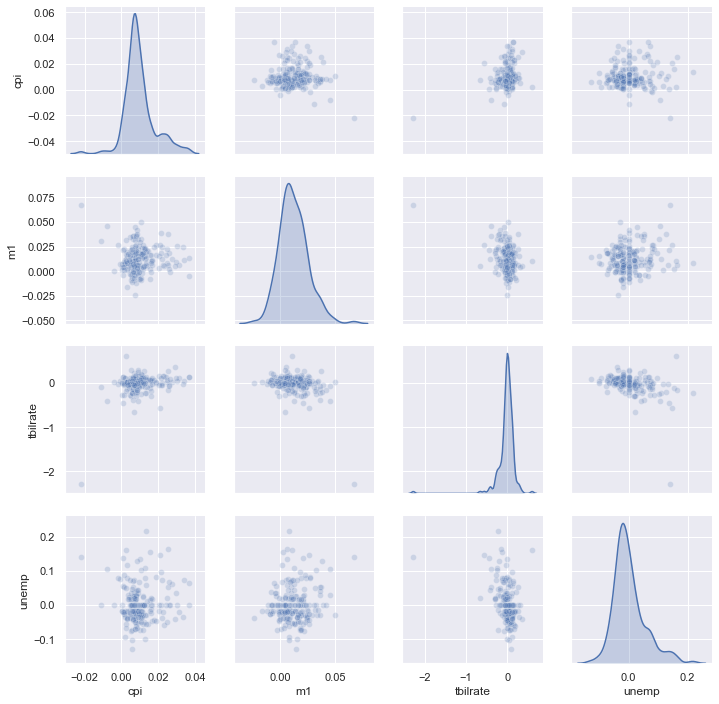

In [528]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001919DEA07C8>,
      dtype=object)

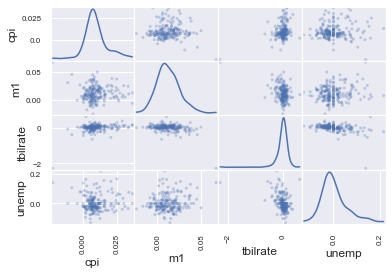

In [533]:
pd.plotting.scatter_matrix(trans_data,diagonal='kde',color='b',alpha=0.3)

### Facet Grids and Categorical Data（多面网格和类别数据）

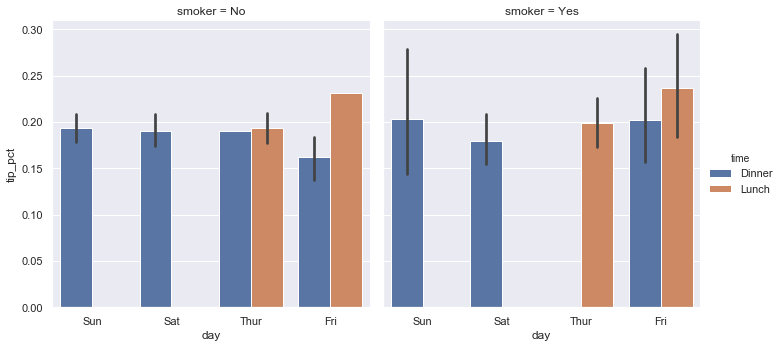

In [537]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker', 
               kind='bar', data=tips[tips.tip_pct < 1])

In [538]:
sns.catplot?

##### 给每一个time也独立绘图

In [541]:
tips[tips.tip_pct < 1].head()

total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.063204
1       10.34  1.66     No  Sun  Dinner     3  0.191244
2       21.01  3.50     No  Sun  Dinner     3  0.199886
3       23.68  3.31     No  Sun  Dinner     2  0.162494
4       24.59  3.61     No  Sun  Dinner     4  0.172069

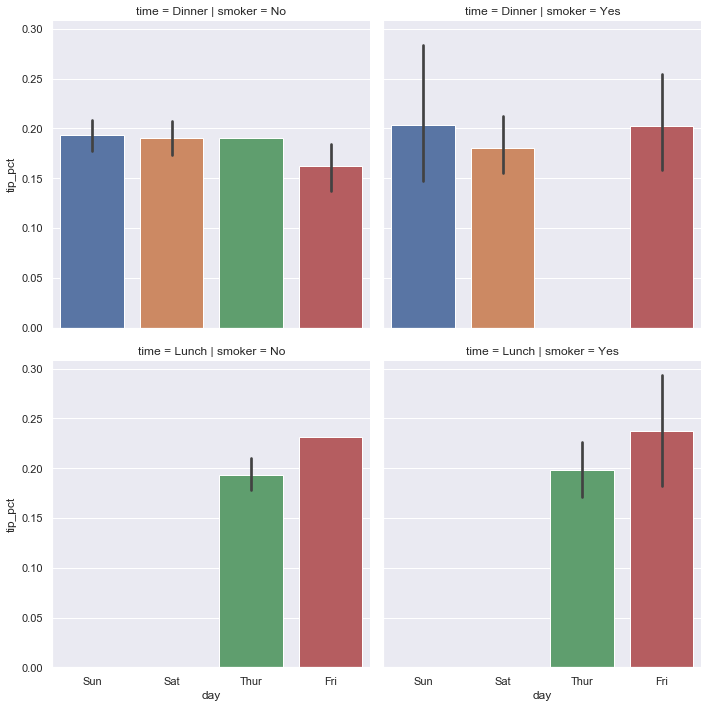

In [544]:
sns.catplot(x='day', y='tip_pct', row='time',col='smoker', kind='bar', data=tips[tips.tip_pct<1])

### 箱线图

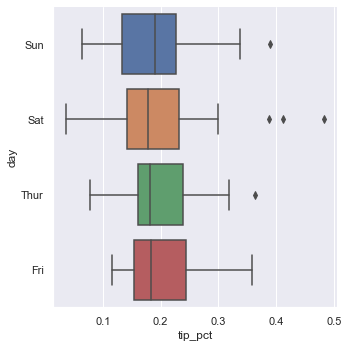

In [545]:
sns.factorplot(x='tip_pct', y='day', kind='box',data=tips[tips.tip_pct < 0.5])